<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🏦 Bank Customer Churn 📉
    </h1>
</div>


# 📂 Tổng quan

**Bối cảnh**

Mọi ngân hàng đều mong muốn giữ chân khách hàng để duy trì hoạt động kinh doanh. Hiểu được lý do khách hàng rời bỏ sẽ giúp các ngân hàng cải thiện chính sách chăm sóc khách hàng và giảm chi phí.

### **Mục tiêu của dự án**

***Dựa trên tập dữ liệu, chúng ta sẽ tìm hiểu nguyên nhân khiến khách hàng rời bỏ ngân hàng và từ đó đưa ra các chiến lược phù hợp để hỗ trợ ngân hàng giữ chân khách hàng.***


**Các đặc trưng chính**

**Biến mục tiêu**

* `Exited`: *khách hàng có rời khỏi ngân hàng hay không.*

### **Đặc điểm dữ liệu**

* `RowNumber`: Số thứ tự của bản ghi (dòng dữ liệu), không ảnh hưởng đến kết quả dự đoán.
* `CustomerId`: Mã khách hàng được tạo ngẫu nhiên, không ảnh hưởng đến việc rời bỏ ngân hàng.
* `Surname`: Họ của khách hàng, không có tác động đến quyết định rời đi.
* `CreditScore`: Điểm tín dụng của khách hàng.
* `Geography`: Các khu vực sinh sống của khách hàng.
* `Gender`: Giới tính.
* `Age`: Độ tuổi.
* `Tenure`: Số năm khách hàng đã gắn bó với ngân hàng.
* `Balance`: Số dư tài khoản của khách hàng.
* `NumOfProducts`: Số lượng sản phẩm mà khách hàng đã sử dụng tại ngân hàng.
* `HasCrCard`: Khách hàng có sở hữu thẻ tín dụng hay không.
* `IsActiveMember`: Khách hàng hoạt động hay không hoạt động.
* `EstimatedSalary`: Thu nhập ước tính của khách hàng.
* `Complain`: Khách hàng có phàn nàn hay không.
* `SatisfactionScore`: Điểm hài lòng – điểm số khách hàng đánh giá cho việc xử lý khiếu nại.
* `Card Type`: Loại thẻ tín dụng mà khách hàng sở hữu.
* `Points Earned`: Điểm thưởng khách hàng nhận được khi sử dụng thẻ tín dụng.

**Tệp dữ liệu được cung cấp**

* `Customer-Churn-Records.csv`: Tập dữ liệu khách hàng.

(Nguồn: [Kaggle Dataset](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display utilities for Jupyter notebooks
from IPython.display import display

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [2]:
# Load the datasets
df_customer_churn = pd.read_csv("Customer-Churn-Records.csv")
# Verify shapes
print("Data Shape:", df_customer_churn.shape)

Data Shape: (10000, 18)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [3]:
# Display few rows of dataset
print("Data Preview:")
display(df_customer_churn.head())

Data Preview:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  

## Nhận định từ Khám phá Dữ liệu Ban đầu

**Kích thước và Cấu trúc Dữ liệu**

* **Tập dữ liệu** bao gồm **10.000** mẫu với **18** cột, trong đó có biến mục tiêu `Exited`.

**Tổng quan về các đặc trưng**

* Tập dữ liệu chứa đầy đủ các thuộc tính quan trọng:

  * **Biến số (numerical):** `CreditScore`, `Age`, `Tenure`, `Balance`, `EstimatedSalary`, `Points Earned`.
  * **Biến phân loại (categorical):** `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`, `Complain`, `Card Type`, `Satisfaction Score`, `NumOfProducts`.
* Biến mục tiêu hiện đang có kiểu dữ liệu **int64**, tuy nhiên nên chuyển sang **int8** để tiết kiệm bộ nhớ.

**Tính đầy đủ của dữ liệu**

* Dữ liệu **không có giá trị thiếu**, nên không cần xử lý missing values.
* Kiểu dữ liệu phù hợp: các biến số có kiểu `float64` hoặc `int64`, các biến phân loại là kiểu chuỗi (`object`).
* Các cột `Surname`, `RowNumber`, `CustomerId` **không mang giá trị phân tích**, nên có thể **loại bỏ** để đơn giản hóa quá trình xử lý.

In [5]:
df_customer_churn.drop(columns="Surname", axis=1, inplace=True)
df_customer_churn.drop(columns="RowNumber", axis=1, inplace=True)
df_customer_churn.drop(columns="CustomerId", axis=1, inplace=True)

In [6]:
df_customer_churn.columns = (
    df_customer_churn.columns
    .str.strip()
    .str.replace(" ", "")
)

df_customer_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'SatisfactionScore', 'CardType', 'PointEarned'],
      dtype='object')

In [7]:
print("Data describe:")
cm = sns.light_palette("green", as_cmap=True)
display(df_customer_churn.drop(columns=["Geography", "Gender", "HasCrCard", "IsActiveMember", "Complain", "CardType", 
                "SatisfactionScore", "NumOfProducts", "Exited"], axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
PointEarned,10000.000000,606.515100,225.924839,119.000000,410.000000,605.000000,801.000000,1000.000000


## Thống kê mô tả từ Dữ liệu

**Tổng quan về các đặc trưng:**

**CreditScore** (Điểm tín dụng)

* Trung bình: 650.53
* Độ lệch chuẩn: 96.65 → Cho thấy mức độ phân tán tương đối cao
* Khoảng giá trị: từ 350 đến 850 → Trải dài từ mức tín dụng kém đến xuất sắc

**Age** (Tuổi)

* Trung bình: 38.92 tuổi, dao động từ 18 đến 92 tuổi
* Phân vị thứ 25: 32, phân vị thứ 75: 44 → Chủ yếu tập trung vào độ tuổi lao động

**Tenure** (Thời gian gắn bó với ngân hàng)

* Trung bình: 5 năm
* Khoảng: từ 0 đến 10 năm → Phân bố tương đối đều theo độ trung thành của khách hàng

**Balance** (Số dư tài khoản)

* Giá trị trung bình cao: \$76,486 nhưng độ lệch chuẩn lớn (\$62,397) → Sự chênh lệch đáng kể giữa các khách hàng
* 25% khách hàng có số dư bằng \$0 → Có thể là dấu hiệu của tài khoản ít sử dụng hoặc đã rút hết tiền

**EstimatedSalary** (Mức lương ước tính)

* Trung bình: \$100,090, được xem là khá cao
* Dao động rộng: từ \$11.58 đến \$199,992
* Trung vị gần với trung bình → Phân phối khá đồng đều

**Points Earned** (Điểm thưởng)

* Trung bình: 606.52
* Dao động từ 119 đến 1000 điểm → Có thể phản ánh mức độ tương tác hoặc giá trị của khách hàng

**Nhận định chung:**

* Dữ liệu có **kích thước lớn** (10.000 mẫu), phù hợp cho các phân tích và khai phá dữ liệu.
* Một số biến như `Balance`, `EstimatedSalary`, `CreditScore` có độ phân tán cao →  sự xuất hiện của **giá trị ngoại lai (outliers)**.
* Đa số khách hàng thuộc **nhóm tuổi lao động**, và thể hiện sự **gắn bó vừa đến dài hạn** (thể hiện qua thời gian gắn bó trung bình là 5 năm).
* Sự đa dạng trong điểm tín dụng và điểm thưởng phản ánh **sự khác biệt rõ rệt về hành vi tài chính** và mức độ tương tác của khách hàng.

In [8]:
cat_features = ["Geography", "Gender", "CardType"]
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_customer_churn)

In [9]:
# Cast type features to save memory.
df_customer_churn["CreditScore"] = df_customer_churn["CreditScore"].astype("int16")
df_customer_churn["Age"] = df_customer_churn["Age"].astype("int8")
df_customer_churn["Tenure"] = df_customer_churn["Tenure"].astype("int8")
df_customer_churn["Balance"] = df_customer_churn["Balance"].astype("float32")
df_customer_churn["Exited"] = df_customer_churn["Exited"].astype("int8")
df_customer_churn["PointEarned"] = df_customer_churn["PointEarned"].astype("int16")
df_customer_churn["EstimatedSalary"] = df_customer_churn["EstimatedSalary"].astype("float32")

df_customer_churn["HasCrCard"] = df_customer_churn["HasCrCard"].astype("int8")
df_customer_churn["IsActiveMember"] = df_customer_churn["IsActiveMember"].astype("int8")
df_customer_churn["Complain"] = df_customer_churn["Complain"].astype("int8")
df_customer_churn["SatisfactionScore"] = df_customer_churn["SatisfactionScore"].astype("int8")
df_customer_churn["NumOfProducts"] = df_customer_churn["NumOfProducts"].astype("int8")

In [10]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int16   
 1   Geography          10000 non-null  category
 2   Gender             10000 non-null  category
 3   Age                10000 non-null  int8    
 4   Tenure             10000 non-null  int8    
 5   Balance            10000 non-null  float32 
 6   NumOfProducts      10000 non-null  int8    
 7   HasCrCard          10000 non-null  int8    
 8   IsActiveMember     10000 non-null  int8    
 9   EstimatedSalary    10000 non-null  float32 
 10  Exited             10000 non-null  int8    
 11  Complain           10000 non-null  int8    
 12  SatisfactionScore  10000 non-null  int8    
 13  CardType           10000 non-null  category
 14  PointEarned        10000 non-null  int16   
dtypes: category(3), float32(2), int16(2), int8(

In [11]:
category_cols = ["HasCrCard", "IsActiveMember", "Complain", "SatisfactionScore", "NumOfProducts"]
df_customer_churn[category_cols] = df_customer_churn[category_cols].astype("category")
print("Data describe:")
df_customer_churn.describe(include=["category", "object"]).T

Data describe:


,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Complain,10000,2,0,7956
SatisfactionScore,10000,5,3,2042
CardType,10000,4,DIAMOND,2507


## Nhận định về Các Biến Phân Loại (Categorical Features)

`Geography` (Khu vực địa lý)

* Gồm **3 quốc gia**: `France`, `Germany`, và `Spain`
* Tần suất xuất hiện:

  * `France`: 5.014 khách hàng (**≈ 50%**) → **nhóm chiếm ưu thế**
* **Nhận xét**:

  * Dữ liệu hơi nghiêng về khách hàng từ Pháp

`Gender` (Giới tính)

* Có 2 giá trị: `Male` và `Female`
* `Male` chiếm **5.457 / 10.000** → khoảng **54.6%**
* **Nhận xét**:

  * Phân bố giới tính tương đối cân bằng

`NumOfProducts` (Số sản phẩm sử dụng)

* Có 4 giá trị: `1, 2, 3, 4`
* Giá trị phổ biến nhất là **1** → 5.084 khách hàng (**≈ 51%**)
* **Nhận xét**:

  * Đa số khách hàng chỉ sử dụng **một sản phẩm ngân hàng**

`HasCrCard` (Có thẻ tín dụng)

* Hai giá trị: `1` (có), `0` (không)
* `1` chiếm 7.055 (**≈ 70.5%**) → đa số khách hàng **có thẻ tín dụng**

`IsActiveMember` (Khách hàng hoạt động)

* Hai giá trị: `1` (có hoạt động), `0` (không hoạt động)
* `1` chiếm 5.151 → gần như **chia đều 50/50**

`Complain` (Phàn nàn)

* Hai giá trị: `0` (không phàn nàn), `1` (có phàn nàn)
* `0` chiếm 7.956 → **≈ 80% không phàn nàn**

`SatisfactionScore` (Điểm hài lòng)

* Có 5 mức từ `1` đến `5`
* Mức phổ biến nhất là `3` (2.042 khách hàng)

`CardType` (Loại thẻ)

* Có 4 loại thẻ, giả định là: `DIAMOND`, `GOLD`, `SILVER`, `PLATINUM`
* `DIAMOND` là loại phổ biến nhất: 2.507 khách hàng.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Handling Missing Value

In [12]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_customer_churn, dataset_name="Data", style=2)

Data Missing Value Analysis
✅ No missing values detected in 10,000 rows


## Checking duplicate Value

In [13]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_customer_churn, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_customer_churn.duplicated().sum(),
    "total_rows": len(df_customer_churn)
}

🔍 Data Duplicate Analysis
✅ No duplicates found in 10,000 rows


## Checking Outlier Value

In [14]:
num_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "PointEarned"]
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_customer_churn, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,CreditScore,15
1,Age,359


## Nhận định về Chất lượng Dữ liệu: Giá trị Thiếu, Trùng lặp và Ngoại lai

**Phân tích Giá trị Thiếu (Missing Values)**

* **No missing value** trong tập dữ liệu.

**Phân tích Bản ghi Trùng lặp (Duplicate Records)**

* **No duplicate records**, điều này đảm bảo tính **duy nhất và toàn vẹn** của từng dòng dữ liệu.

**Phân tích Giá trị Ngoại lai (Outliers Records Analysis)**

* **Phát hiện một số giá trị outlier** trong các đặc trưng, tuy nhiên:

  * **Không thể loại bỏ** các giá trị này vì **chúng phản ánh thực tế** trong hành vi khách hàng.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [15]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [16]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Exited Distribution

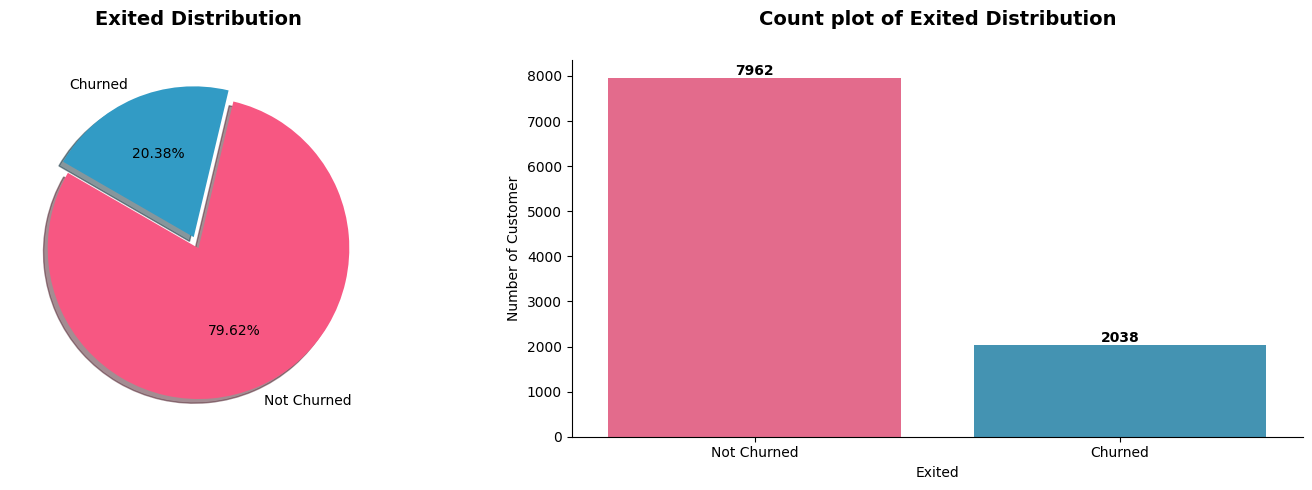

In [17]:
exited_Distribution  = df_customer_churn["Exited"].value_counts().loc[[0, 1]]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
ax[0].pie(
    exited_Distribution,
    labels = ["Not Churned", "Churned"],
    colors = color(n_colors=2),
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Exited Distribution", weight="bold", fontsize=14, pad=25)

# ax[1]
sns.countplot(data=df_customer_churn, x = "Exited", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("Count plot of Exited Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Number of Customer")
ax[1].set_xticks([0, 1], ["Not Churned", "Churned"])
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Nhận định:**

* Khoảng **1 trong 5 khách hàng đã rời bỏ ngân hàng**, phản ánh một tỷ lệ churn thực tế trong ngành ngân hàng.
* Mặc dù dữ liệu có sự **mất cân bằng**, điều này **không phải là sai lệch** — mà là sự phản ánh **tự nhiên** của hành vi khách hàng trong thực tế.

## Numerical Feature Distributions

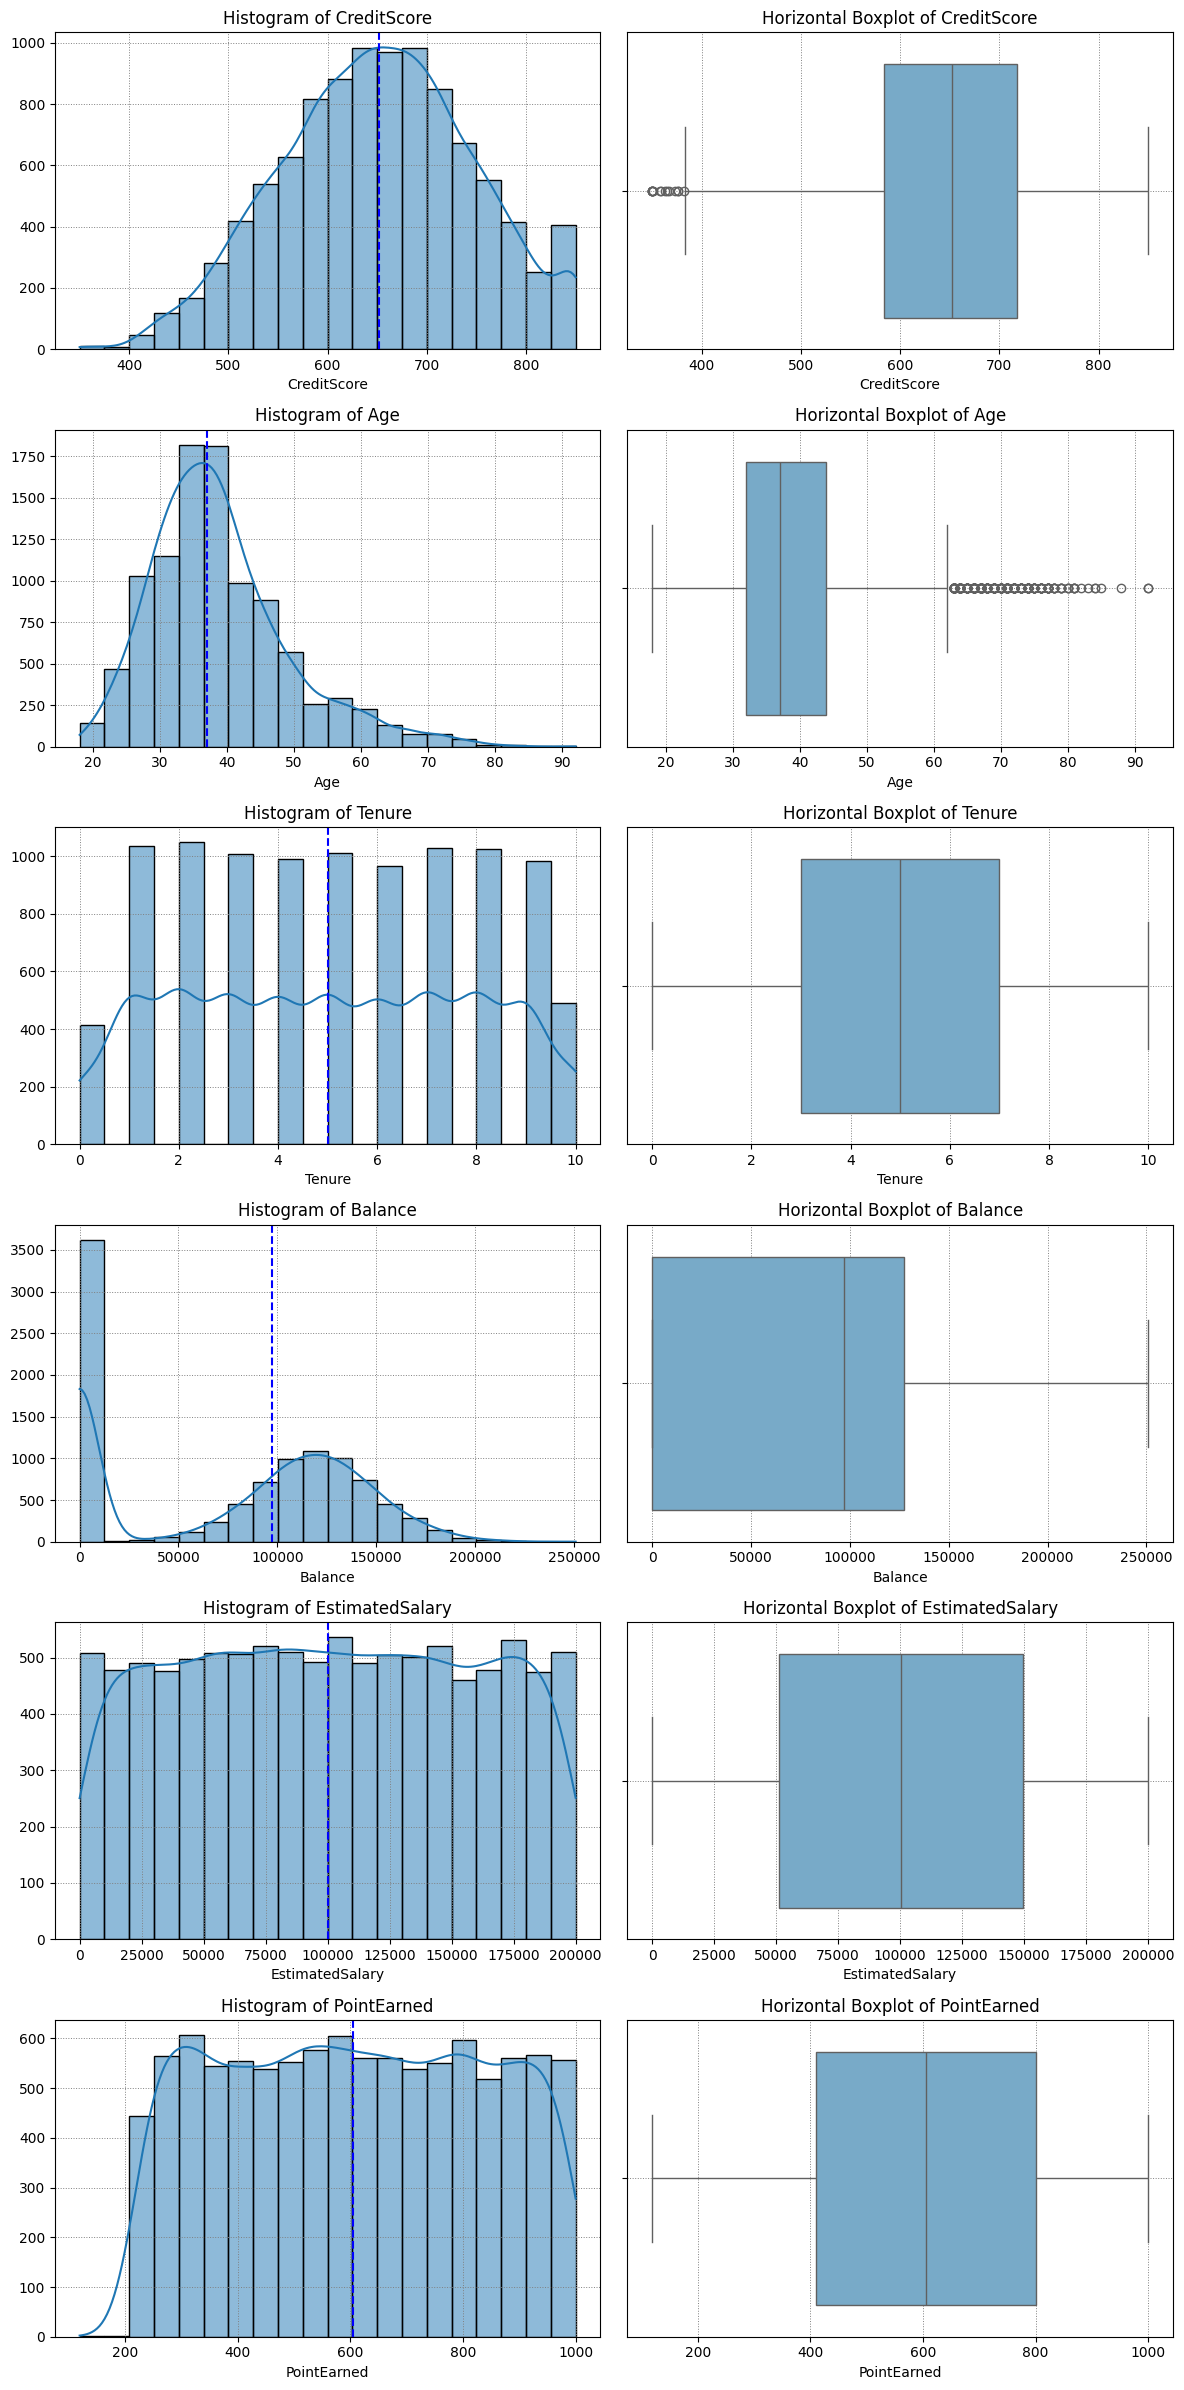

In [18]:
def plot_numerical_features(df=df_customer_churn, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], palette="Blues", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], palette="Blues", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Boxplot of {feature}")
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

### Insights on Numerical Feature Distributions

* **Biểu đồ histogram** cho thấy các đặc trưng được phân bố khá đồng đều trong phạm vi giá trị của chúng.
* **Biểu đồ boxplot** xác nhận phạm vi 50% giá trị trung tâm (**IQR - interquartile range**) và phần râu (**whiskers**) thể hiện toàn bộ khoảng giá trị.

### Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y.

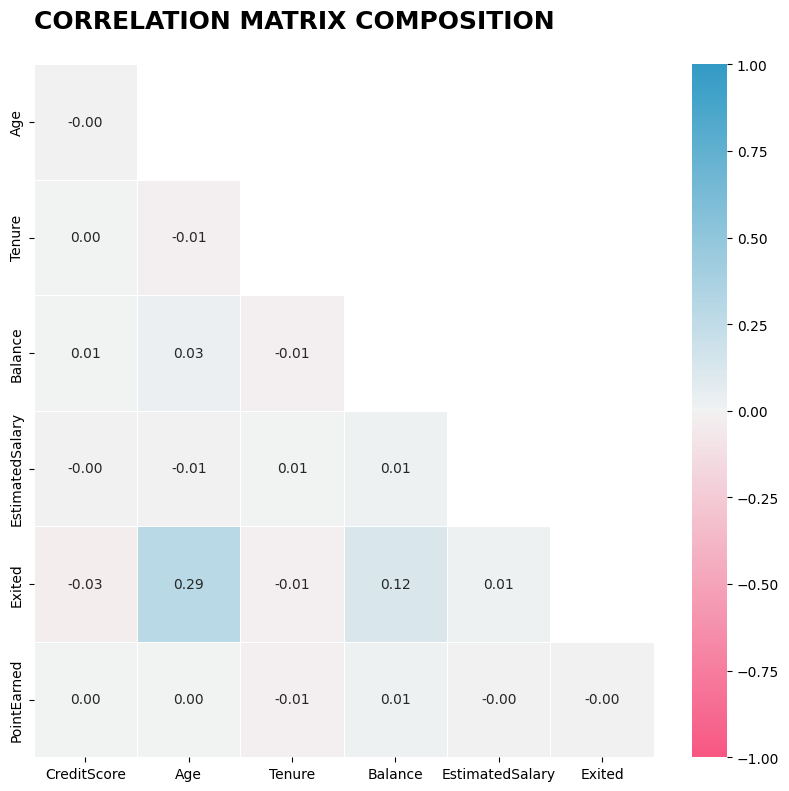

In [19]:
corr_matrix = df_customer_churn.corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = 'CORRELATION MATRIX COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18, weight="bold");

#### Insights from Correlation Analysis of Numerical Features

**Overall Weak Correlations:**

* Hầu hết các hệ số tương quan đều gần bằng **0**, cho thấy **mối quan hệ tuyến tính rất yếu hoặc không tồn tại** giữa các đặc trưng dạng số.

**Implications for Modeling**

* Các hệ số tương quan gần bằng 0 cho thấy mỗi đặc trưng số mang lại **thông tin riêng biệt, không trùng lặp**.
* Do **không có hiện tượng đa cộng tuyến (multicollinearity)**, nên các đặc trưng này **có thể được sử dụng cùng nhau một cách an toàn** trong các mô hình như hồi quy tuyến tính hoặc mô hình cây (tree-based).

**Lưu ý**
Correlation Analysis chỉ dành cho **numerical feature**, bài toán Bank Customer Churn bản chất là bài toán phân loại (Churn/Not Churn) nên không thể thêm target feature **Exited**.

## Categorical Feature Distributions

In [20]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(feature, df = df_customer_churn, order = None, labels_text = None):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))

    sns.countplot(data=df, y = feature, ax=ax[0],
                  palette=color(n_colors=len(df[feature].unique())), order=order)
    ax[0].set_title(f"Count plot of {feature}", fontsize=14, pad=25, weight = "bold")
    ax[0].set_ylabel(feature)
    ax[0].set_xlabel("")
    if feature in ["Complain", "HasCrCard", "IsActiveMember"]:
        ax[0].set_yticks(['0', '1'])
        ax[0].set_yticklabels(labels_text, weight = "bold")
    # ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
    sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

    for p in ax[0].patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax[0].text(width + max(df[feature].value_counts())*0.01, y,
                f"{int(width)}", 
                ha="left", va="center", fontsize=10, fontweight="bold", color="black")

    feature_counts = df[feature].value_counts().sort_index()
    labels = []
    if feature in ["Complain", "HasCrCard", "IsActiveMember"]:
        labels=labels_text
    else:
        labels=feature_counts.index

    wedges, texts, autotexts = ax[1].pie(
        feature_counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=len(df[feature].unique())),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    ax[1].add_artist(centre_circle)
    ax[1].set_title(f"Percentage Distribution of {feature}", pad=25, weight = "bold")
    ax[1].axis("equal")

    plt.tight_layout()
    plt.show()

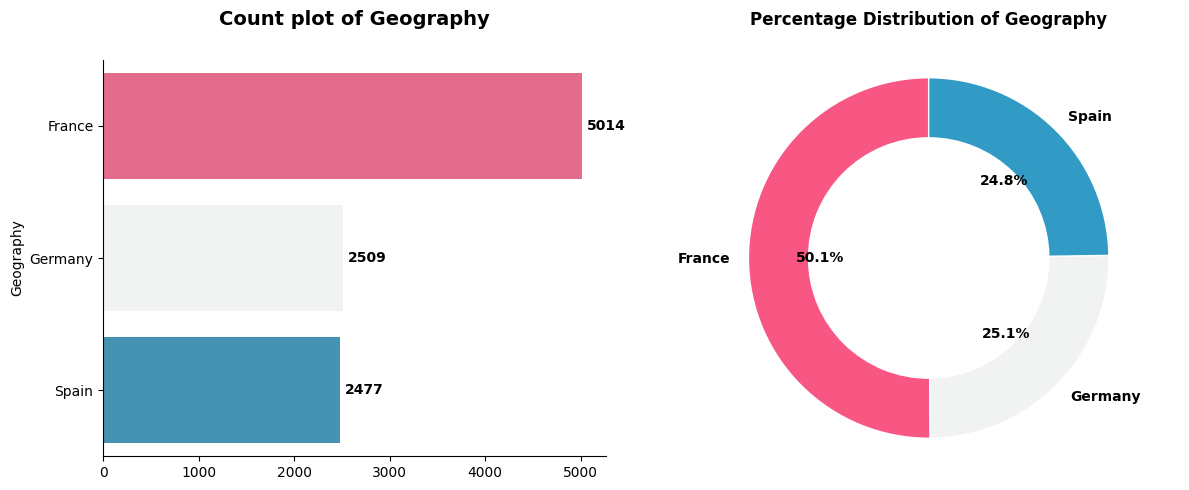

In [21]:
plot_categorical_distribution(feature="Geography")

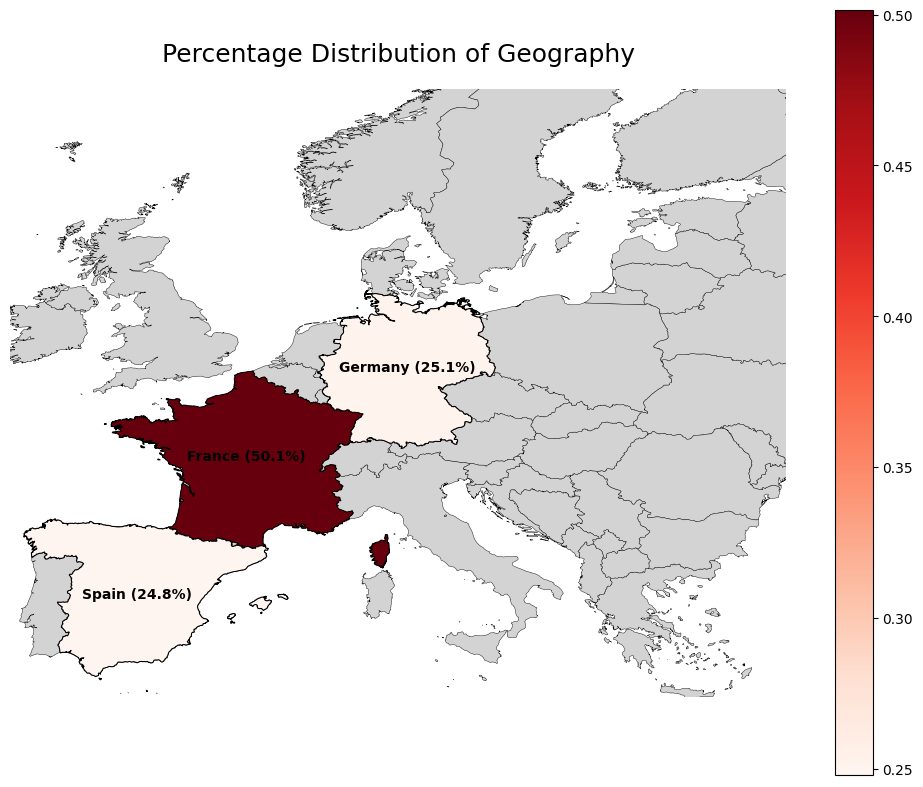

In [22]:
def geography_distribution(df = df_customer_churn):
    import geopandas as gpd

    highlight_countries = df["Geography"].value_counts(normalize=True).to_dict()

    # Read data from "custom.geo.json"
    world = gpd.read_file("custom.geo.json")
    world["churn"] = world["admin"].map(highlight_countries)
    fig, ax = plt.subplots(figsize=(10, 8))
    world.plot(
        ax=ax,
        color="#D3D3D3",
        edgecolor="black",
        linewidth=0.3
    )

    highlighted = world[world["churn"].notnull()]
    highlighted.plot(ax=ax, column="churn", cmap="Reds", edgecolor="black", linewidth=0.8, legend=True)

    for idx, row in highlighted.iterrows():
        point = row["geometry"].representative_point()
        plt.annotate(
            text=f"{row["admin"]} ({row["churn"]*100:.1f}%)",
            xy=(point.x, point.y),
            ha="center",
            fontsize=10,
            color="black",
            weight="bold",
        )

    ax.set_xlim(-10, 30)
    ax.set_ylim(35, 65)

    ax.axis("off")
    ax.set_title("Percentage Distribution of Geography", fontsize=18, pad=20)

    plt.tight_layout()
    plt.show()

geography_distribution(df = df_customer_churn)

**Địa lý (Geography):**

* Có **3 quốc gia**, trong đó **Pháp** chiếm tỷ lệ lớn nhất (**\~50%**) <br>
  ➤ Cả biểu đồ cột và biểu đồ tròn đều thể hiện rõ rằng **Pháp là thị trường chiếm ưu thế**
* **Đức**: 2.509 khách hàng (**≈ 25.1%**)
* **Tây Ban Nha**: 2.477 khách hàng (**≈ 24.8%**) <br>
  ➤ Hai quốc gia này **kết hợp lại chiếm gần 50% còn lại** trong tổng số khách hàng.

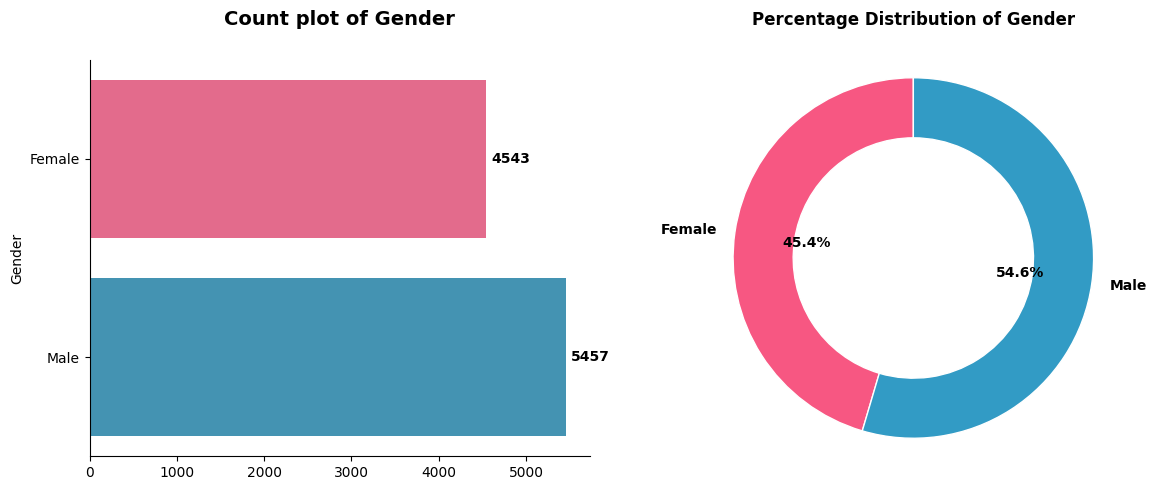

In [23]:
plot_categorical_distribution(feature="Gender")

**Giới tính (Gender)**

* Có sự **mất cân bằng nhẹ về giới tính** trong tập dữ liệu, trong đó **khách hàng nam chiếm đa số**.

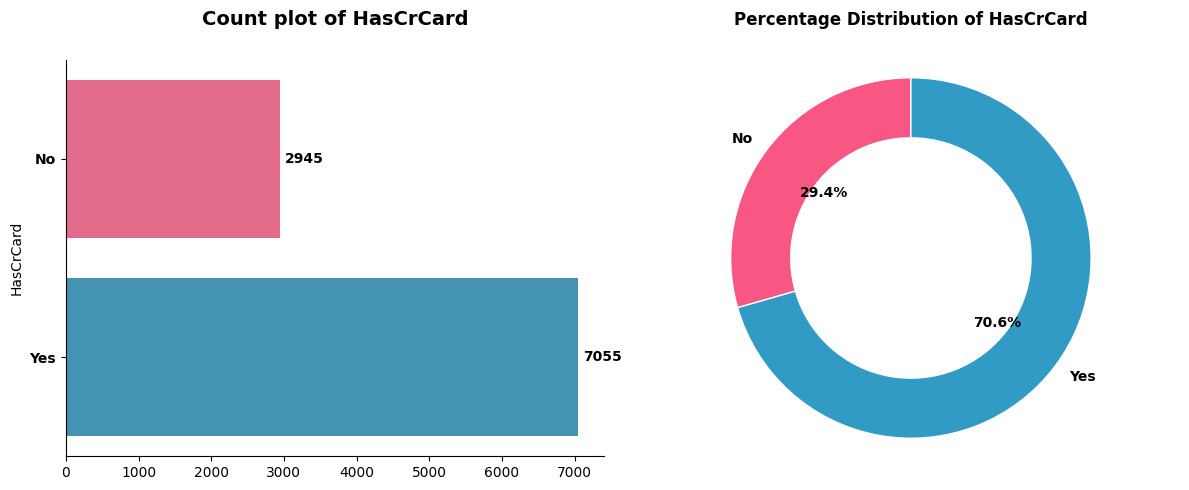

In [24]:
plot_categorical_distribution(feature="HasCrCard", labels_text=["No", "Yes"])

**Sở hữu Thẻ Tín Dụng (HasCrCard)**

* **Nhóm khách hàng có thẻ tín dụng chiếm đa số**, gần **gấp 2.4 lần** so với nhóm không có thẻ.

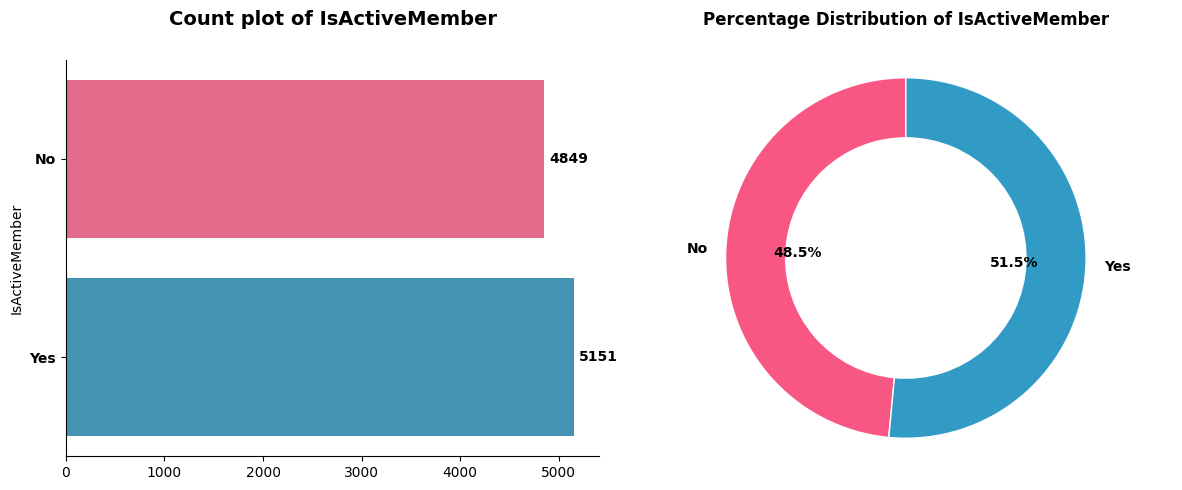

In [25]:
plot_categorical_distribution(feature="IsActiveMember", labels_text=["No", "Yes"])

**Khách hàng Hoạt động (IsActiveMember)**

* **Tỷ lệ gần như cân bằng** giữa hai nhóm (hoạt động và không hoạt động) cho thấy **không có thiên lệch đáng kể** trong dữ liệu.
* Phân bố cân đối như vậy rất **hữu ích cho các phân tích thống kê** và mô hình hóa.

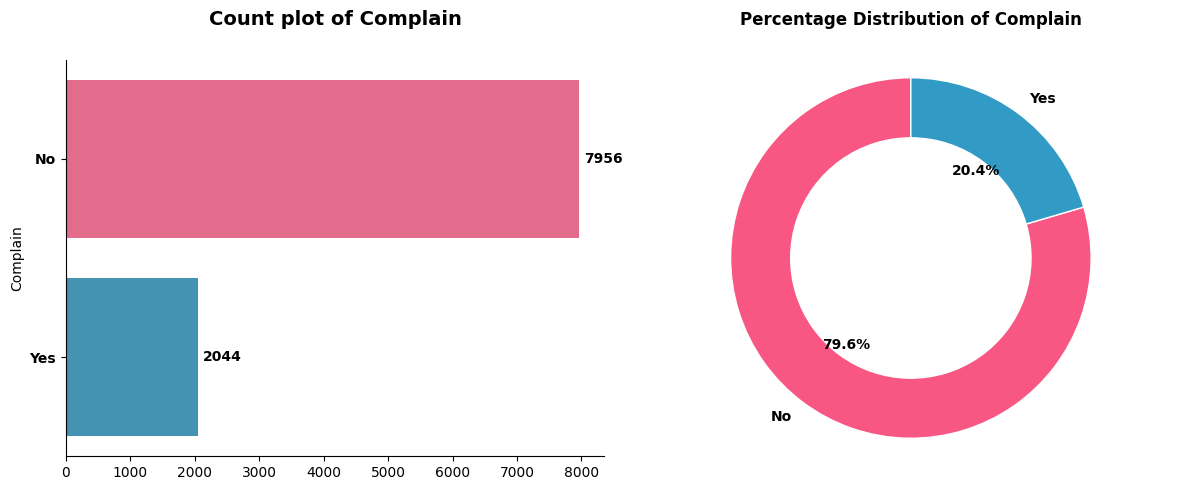

In [26]:
plot_categorical_distribution(feature="Complain", labels_text=["No", "Yes"])

**Phàn nàn (Complain)**

* **Nhóm không phàn nàn (0)** có số lượng **gấp gần 4 lần** so với **nhóm có phàn nàn (1)**.

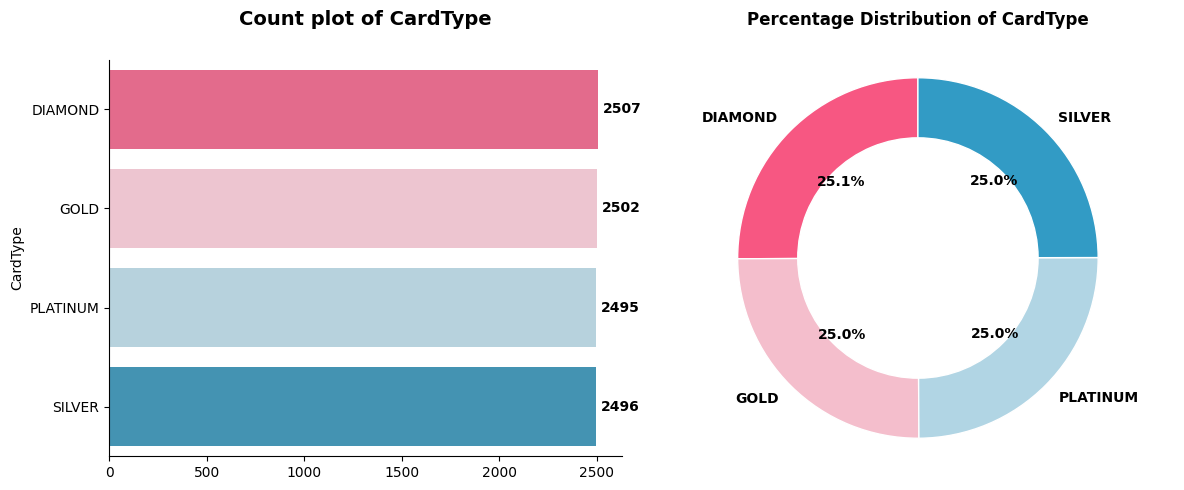

In [27]:
plot_categorical_distribution(feature="CardType")

**Loại Thẻ (CardType)**

* Bốn loại thẻ: **DIAMOND, GOLD, PLATINUM, SILVER** chiếm tỷ lệ **gần như bằng nhau**, mỗi loại khoảng **25%** tổng dữ liệu.
* Tuy nhiên, **DIAMOND** nổi bật hơn một chút với **25.1%**, nhỉnh hơn các loại còn lại (mỗi loại chiếm khoảng **25.0%**).

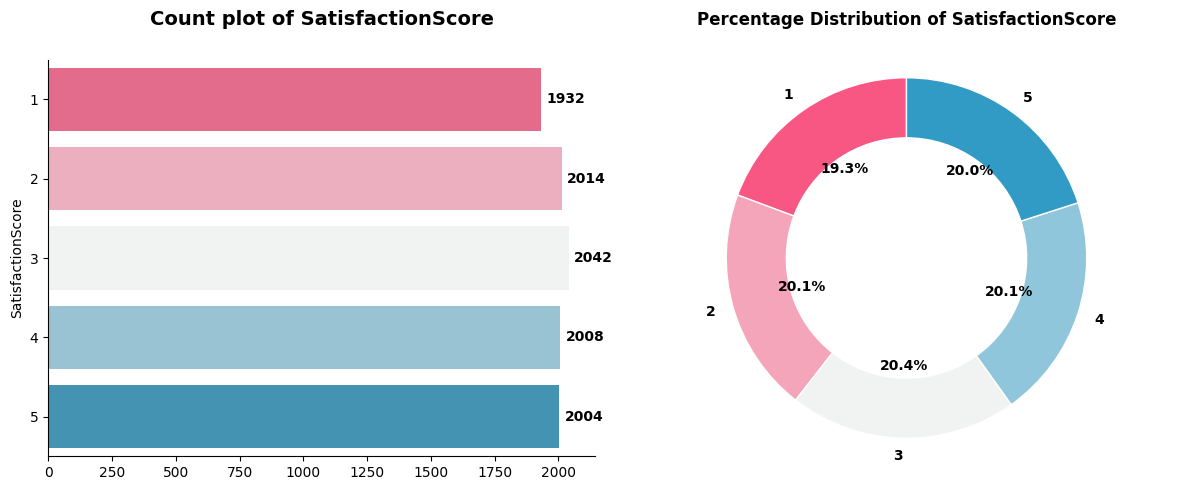

In [28]:
plot_categorical_distribution(feature="SatisfactionScore")

**Điểm Hài Lòng (SatisfactionScore)**

* Mỗi mức điểm từ **1 đến 5** chiếm khoảng **20%** trong tập dữ liệu.
* **Mức điểm 3** nổi bật nhẹ với **20.4%**, nhưng sự chênh lệch này là **rất nhỏ** và **không ảnh hưởng đáng kể đến sự cân bằng tổng thể**.

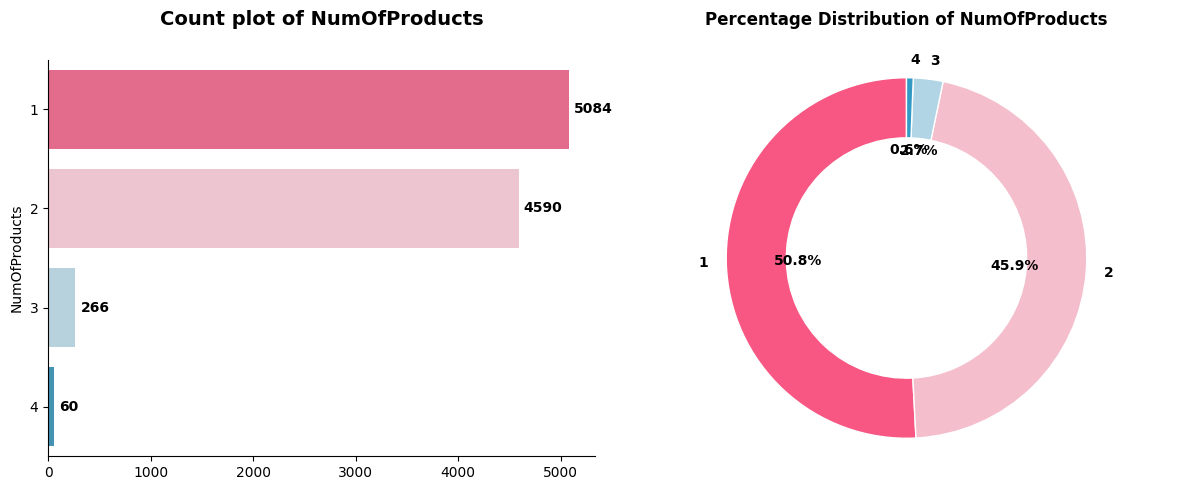

In [29]:
plot_categorical_distribution(feature="NumOfProducts")

**Số Sản phẩm Sử dụng (NumOfProducts)**

* Phân bố của `NumOfProducts` cho thấy **phần lớn khách hàng chỉ sử dụng 1 hoặc 2 dịch vụ**, phản ánh mức độ tương tác còn **khá thấp**.

## Bivariate Analysis

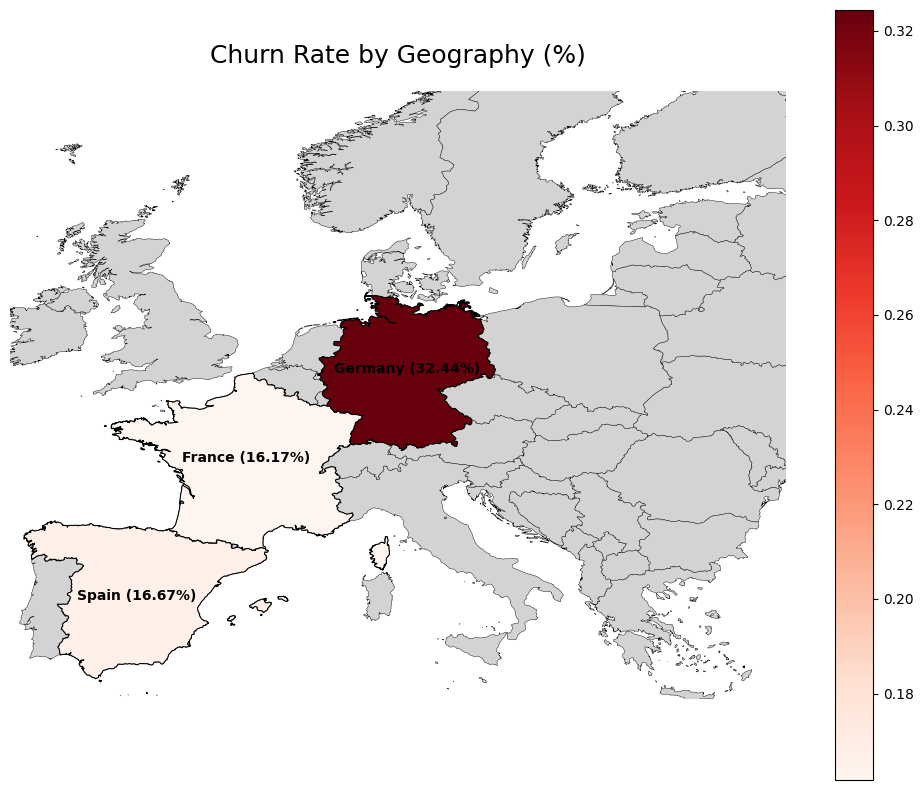

In [30]:
def geography_distribution(df=df_customer_churn):
    import geopandas as gpd
    # 1. Calculate churn rate by Geography: mean() = % of customers who exited
    churn_rate_by_geo = df.groupby("Geography")["Exited"].mean()

    # 2. Load geojson file (country names must match the "admin" column)
    world = gpd.read_file("custom.geo.json")

    # 3. Map churn rate to each country
    world["churn_rate"] = world["admin"].map(churn_rate_by_geo)

    # 4. Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw base map (entire Europe in grey)
    world.plot(ax=ax, color="#D3D3D3", edgecolor="black", linewidth=0.3)

    # Highlight countries that have churn data
    highlighted = world[world["churn_rate"].notnull()]
    highlighted.plot(ax=ax, column="churn_rate", cmap="Reds", edgecolor="black", linewidth=0.8, legend=True)

    # Annotate country names and churn rates
    for idx, row in highlighted.iterrows():
        point = row["geometry"].representative_point()
        plt.annotate(
            text=f"{row['admin']} ({row['churn_rate'] * 100:.2f}%)",
            xy=(point.x, point.y),
            ha="center",
            fontsize=10,
            color="black",
            weight="bold"
        )

    ax.set_xlim(-10, 30)
    ax.set_ylim(35, 65)
    ax.axis("off")
    ax.set_title("Churn Rate by Geography (%)", fontsize=18, pad=20)

    plt.tight_layout()
    plt.show()

geography_distribution()

In [31]:
from IPython.core.display import HTML
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {cat} by Exited</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Exited
    grouped = df.groupby([cat, "Exited"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=10)

    ax[0].set_title(f"Percentage of Exited by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Exited Rate", fontsize=12)
    ax[0].set_xticklabels(labels = labels, rotation = 0)
    ax[0].legend(title="Exited", bbox_to_anchor=(1, 1), loc="upper left")
    # ax[0].legend_.remove()
    # ax[0].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Exited", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=order)
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Exited by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    
    # ax[1].grid(color="gray", linestyle=":", linewidth=0.7)
    ax[1].legend_.remove()
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Exited", df=df, show_residuals=True)

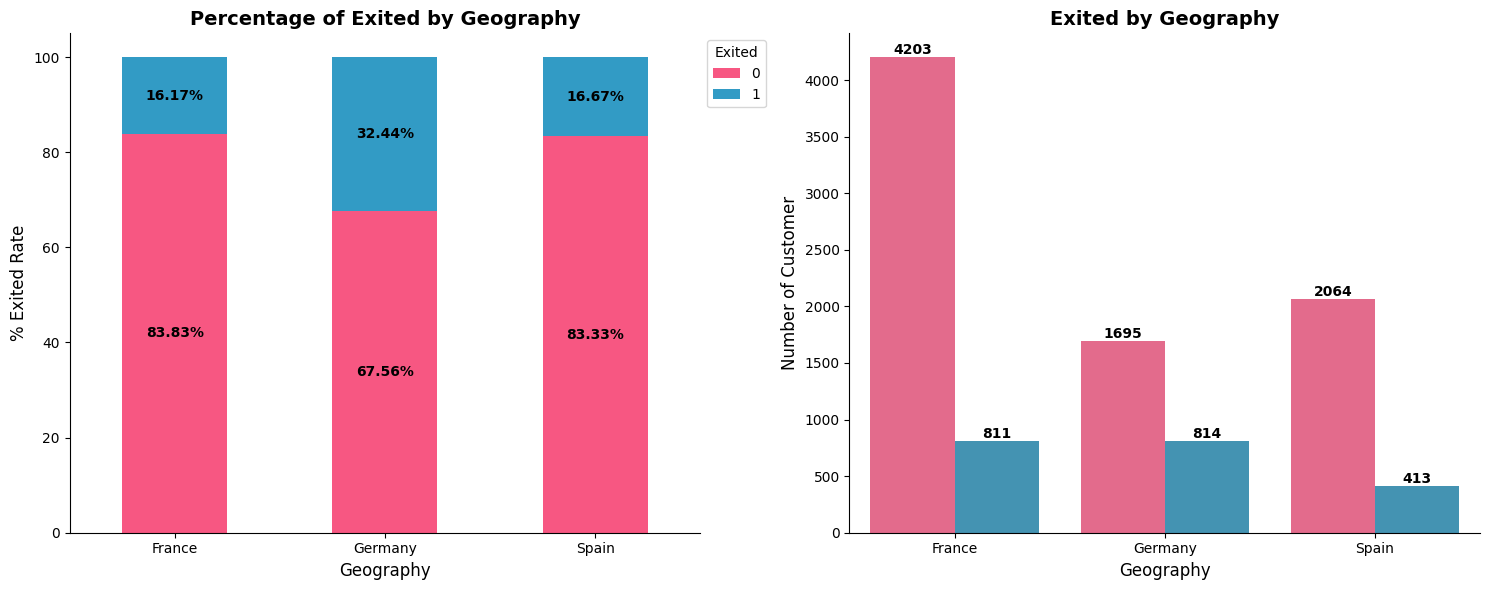


🔍 Chi-Square Test of Independence: 'Geography' vs. 'Exited'
Chi-squared statistic: 300.626
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Geography' and 'Exited'.

📈 Standardized Residuals:
Exited        0      1
Geography             
France     3.34  -6.60
Germany   -6.77  13.38
Spain      2.07  -4.09


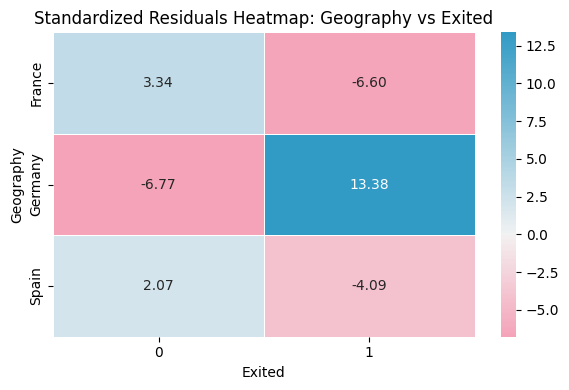

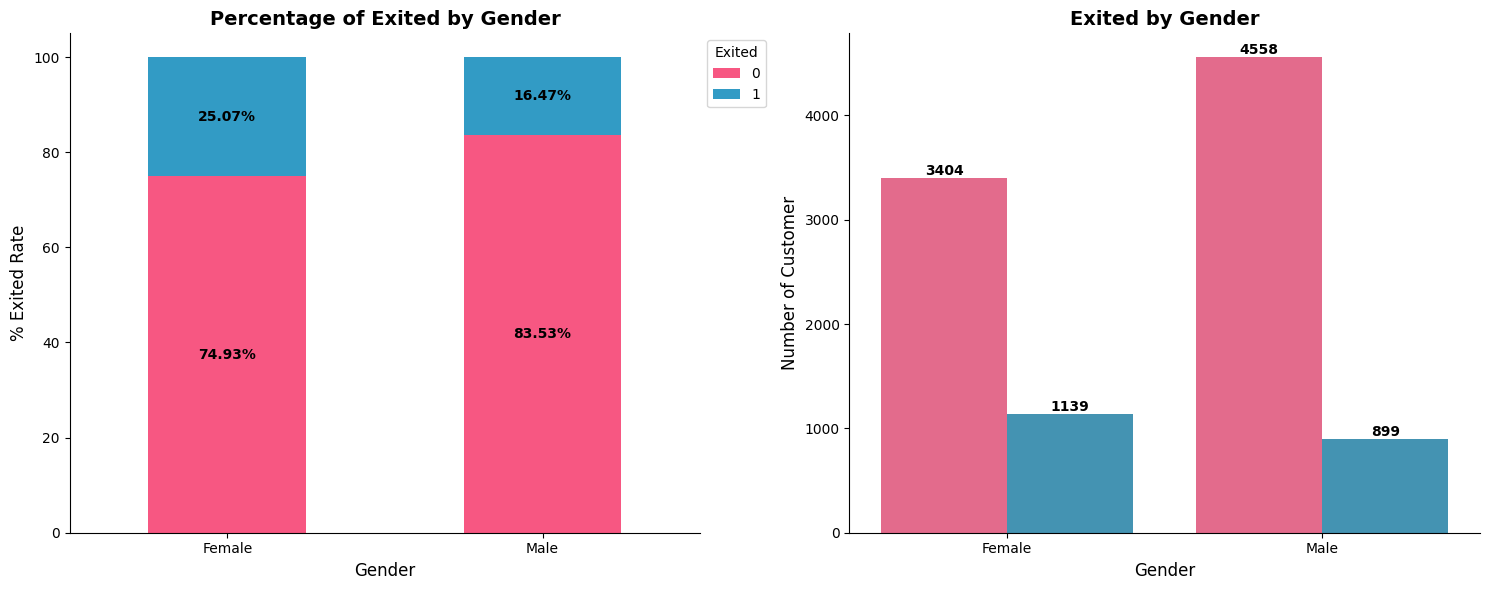


🔍 Chi-Square Test of Independence: 'Gender' vs. 'Exited'
Chi-squared statistic: 112.397
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Gender' and 'Exited'.

📈 Standardized Residuals:
Exited     0     1
Gender            
Female -3.54  7.00
Male    3.23 -6.39


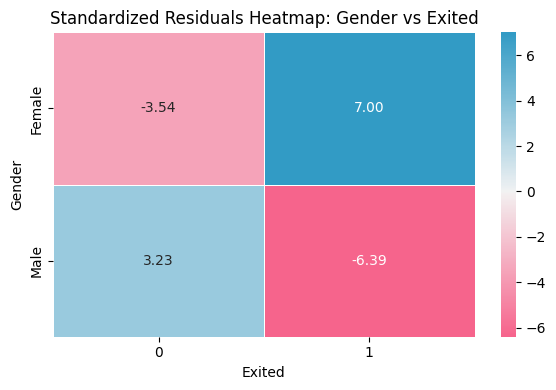

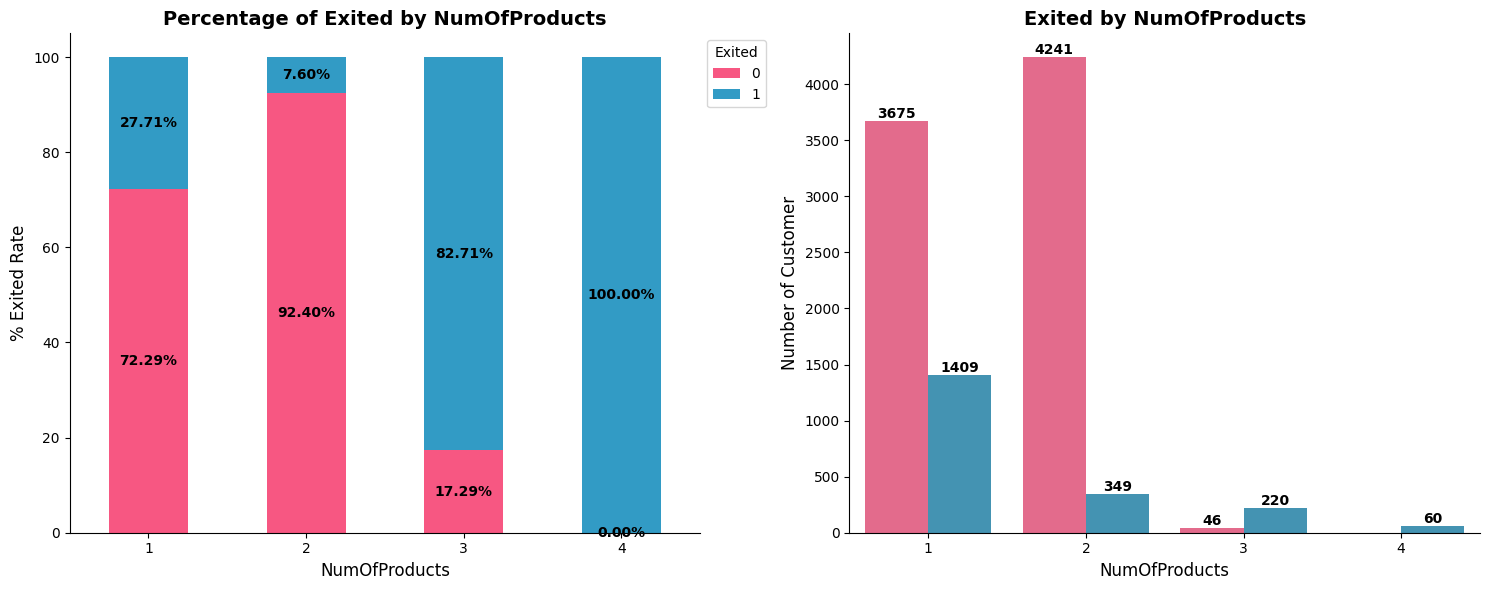


🔍 Chi-Square Test of Independence: 'NumOfProducts' vs. 'Exited'
Chi-squared statistic: 1501.505
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'NumOfProducts' and 'Exited'.

📈 Standardized Residuals:
Exited             0      1
NumOfProducts              
1              -5.86  11.58
2               9.70 -19.17
3             -11.39  22.52
4              -6.91  13.66


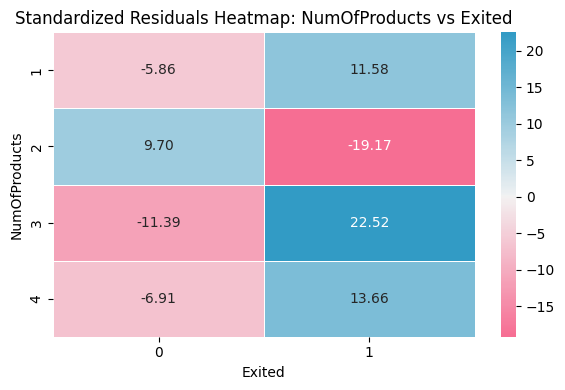

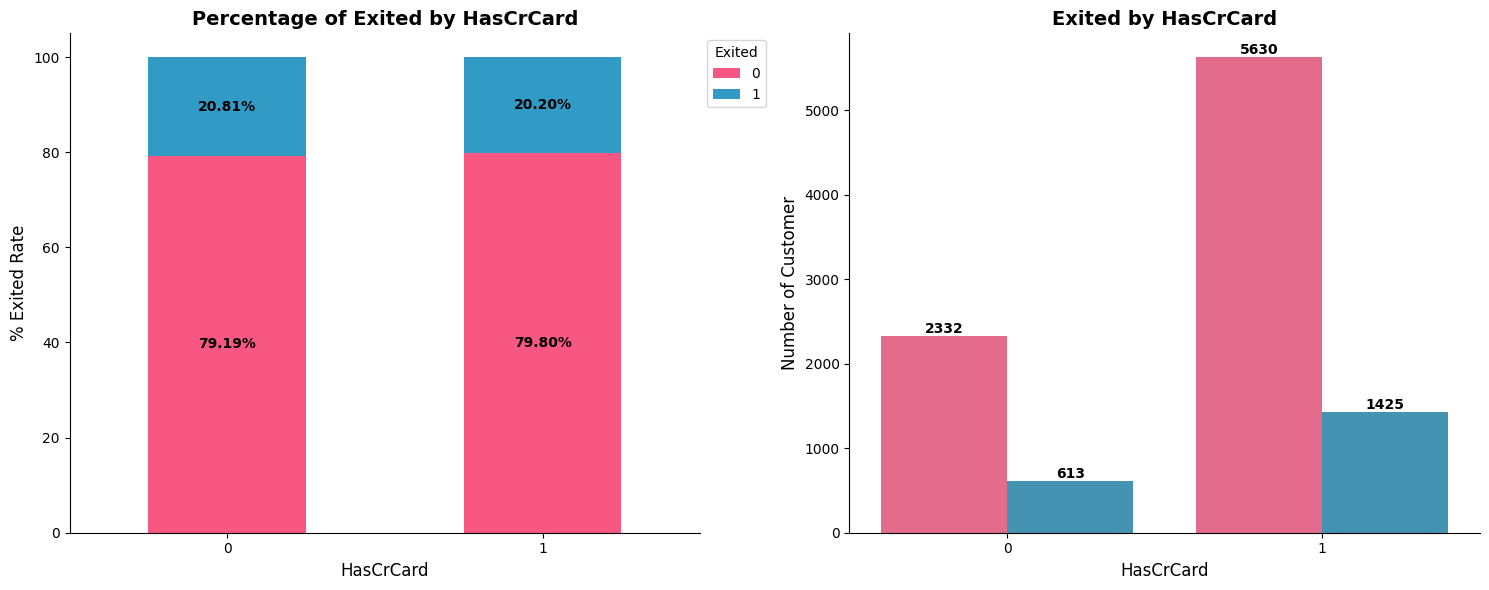


🔍 Chi-Square Test of Independence: 'HasCrCard' vs. 'Exited'
Chi-squared statistic: 0.449
Degrees of freedom: 1
p-value: 0.502618
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'HasCrCard' and 'Exited'.

📈 Standardized Residuals:
Exited        0     1
HasCrCard            
0         -0.26  0.52
1          0.17 -0.34


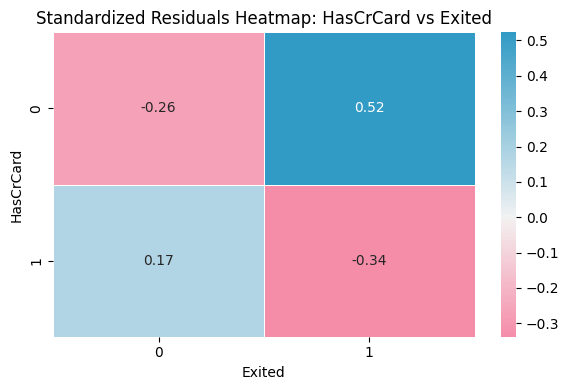

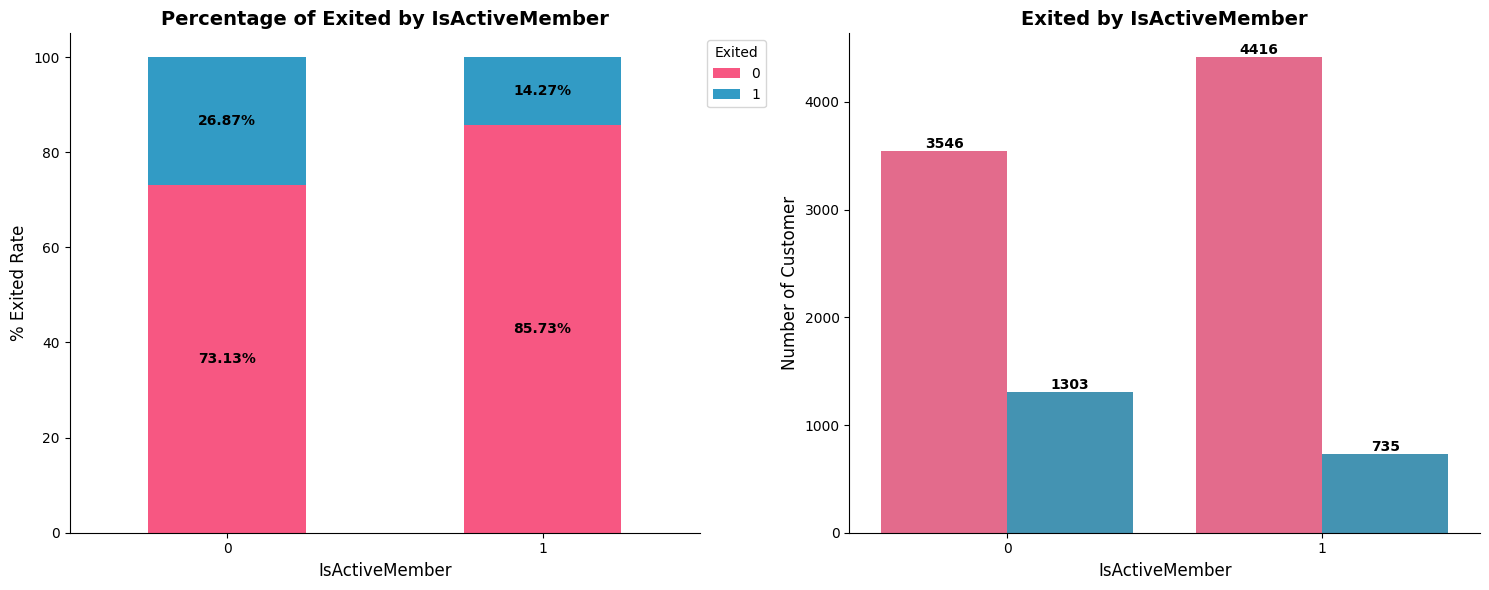


🔍 Chi-Square Test of Independence: 'IsActiveMember' vs. 'Exited'
Chi-squared statistic: 243.695
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'IsActiveMember' and 'Exited'.

📈 Standardized Residuals:
Exited             0      1
IsActiveMember             
0              -5.07  10.01
1               4.92  -9.72


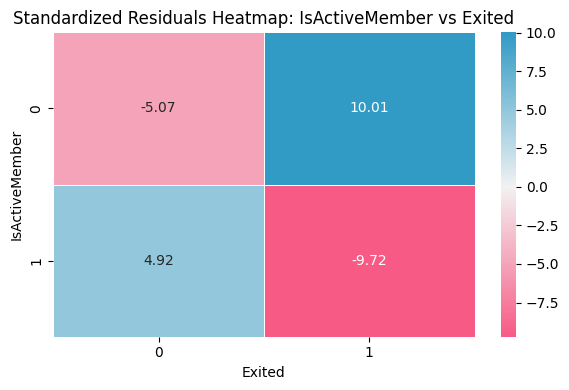

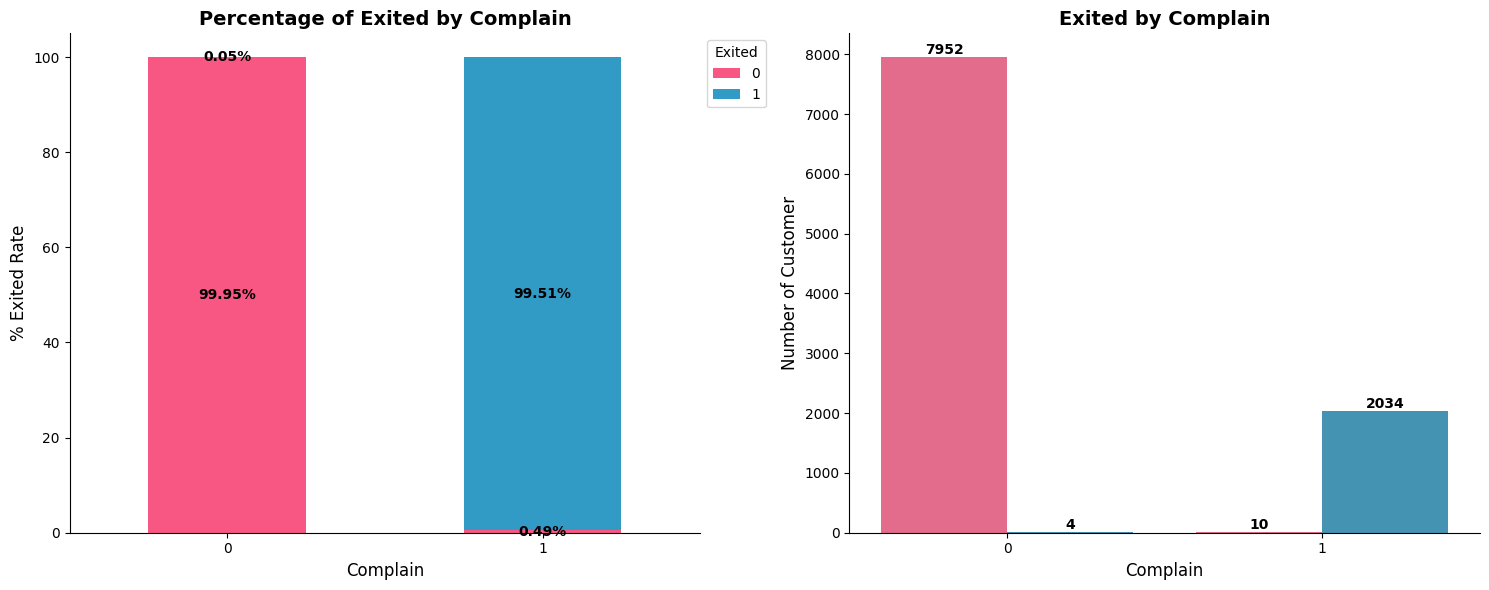


🔍 Chi-Square Test of Independence: 'Complain' vs. 'Exited'
Chi-squared statistic: 9907.907
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Complain' and 'Exited'.

📈 Standardized Residuals:
Exited        0      1
Complain              
0         20.32 -40.17
1        -40.09  79.25


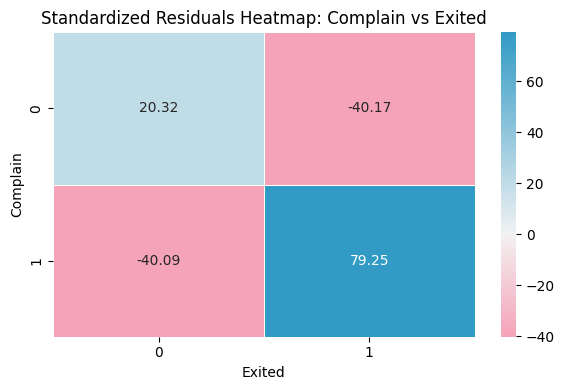

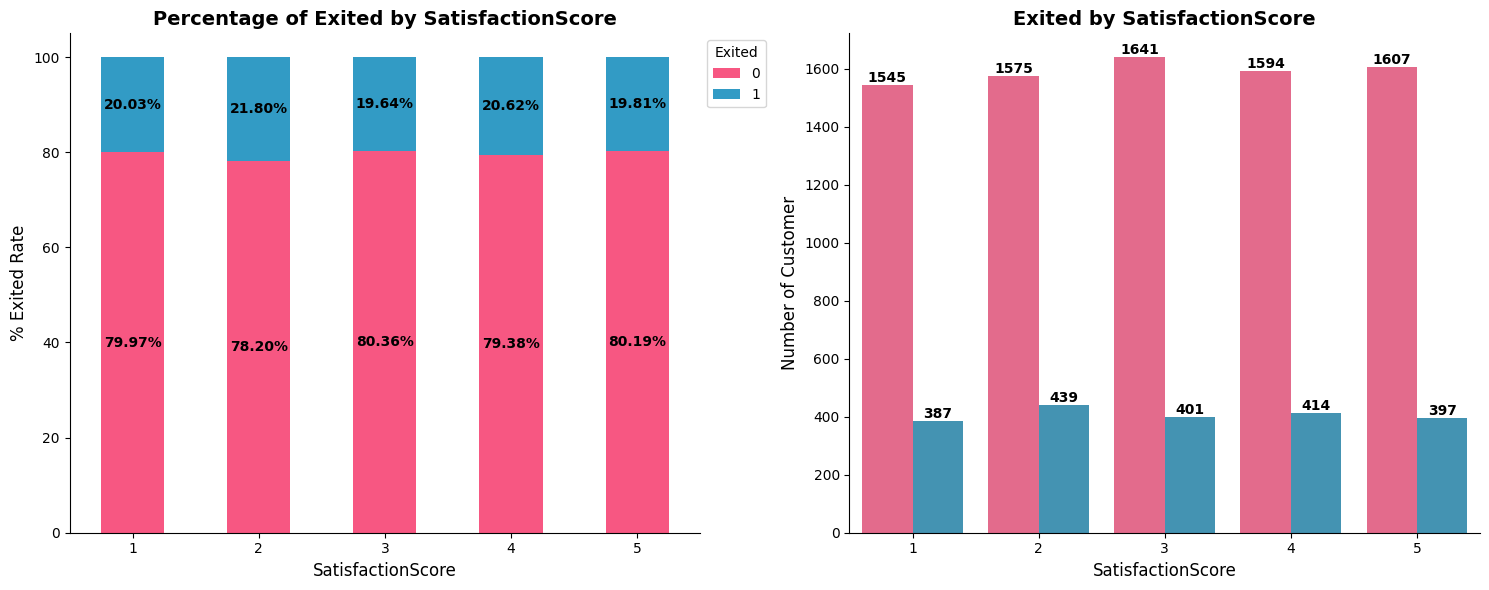


🔍 Chi-Square Test of Independence: 'SatisfactionScore' vs. 'Exited'
Chi-squared statistic: 3.803
Degrees of freedom: 4
p-value: 0.433365
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'SatisfactionScore' and 'Exited'.

📈 Standardized Residuals:
Exited                0     1
SatisfactionScore            
1                  0.17 -0.34
2                 -0.71  1.41
3                  0.38 -0.74
4                 -0.12  0.24
5                  0.29 -0.56


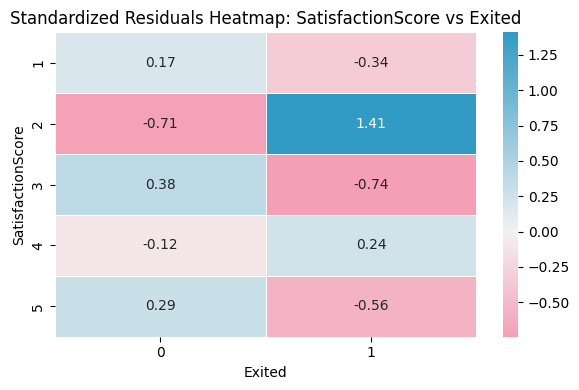

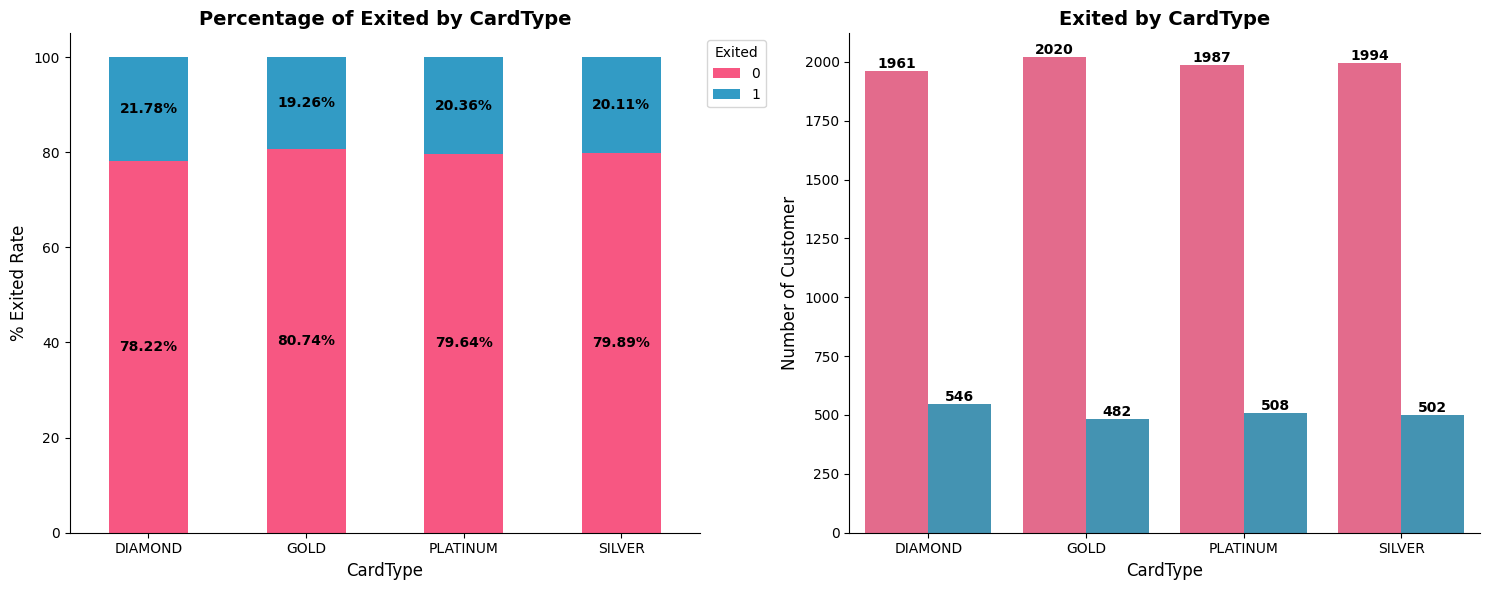


🔍 Chi-Square Test of Independence: 'CardType' vs. 'Exited'
Chi-squared statistic: 5.053
Degrees of freedom: 3
p-value: 0.167941
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'CardType' and 'Exited'.

📈 Standardized Residuals:
Exited       0     1
CardType            
DIAMOND  -0.79  1.55
GOLD      0.63 -1.24
PLATINUM  0.01 -0.02
SILVER    0.15 -0.30


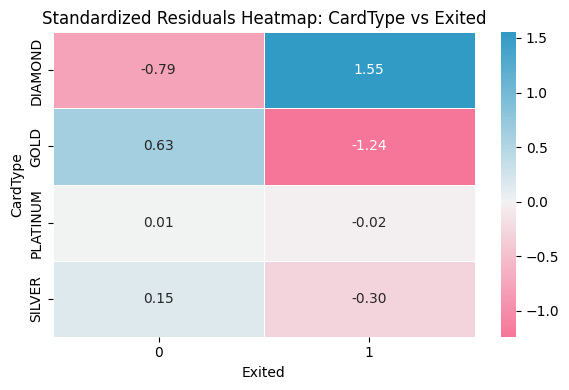

In [32]:
for feature in df_customer_churn.select_dtypes(include=["category"]).columns.tolist():
    bivariate_percent_plot(cat=feature, df= df_customer_churn)

### Insight for Categorical Features by Exited

**Phân tích các biến phân loại theo tỷ lệ rời bỏ (Attrition)**

`Geography` (Địa lý)

* Kiểm định Chi-Square cho thấy có **mối quan hệ mạnh và có ý nghĩa thống kê** giữa vị trí địa lý của khách hàng và khả năng họ rời khỏi ngân hàng.
* Khách hàng đến từ **Đức (Germany)** có **xu hướng rời đi cao hơn rõ rệt**, thể hiện qua **giá trị dư chuẩn hóa dương lớn** (13.38).
* Ngược lại, khách hàng từ **Pháp (France)** và **Tây Ban Nha (Spain)** **có xu hướng ở lại nhiều hơn so với kỳ vọng**, đặc biệt là Pháp với giá trị dư chuẩn hóa âm lớn (-6.60). <br>
  ➤ Vì vậy, **“Geography” là một biến phân loại có ảnh hưởng lớn** đến phân tích tỷ lệ rời bỏ và cần được cân nhắc kỹ trong các chiến lược giữ chân khách hàng.

`Gender` (Giới tính)

* **Giới tính là yếu tố có ảnh hưởng đáng kể đến hành vi rời bỏ của khách hàng**.
* **Khách hàng nữ có tỷ lệ rời bỏ cao hơn** so với khách hàng nam.

Đây là một tín hiệu rõ ràng cho doanh nghiệp cần hành động — nên xem xét **các chiến lược giữ chân khách hàng theo giới tính**, đặc biệt tập trung vào việc **nâng cao mức độ hài lòng của khách hàng nữ**.

`HasCrCard` (Có thẻ tín dụng)

Mặc dù có sự khác biệt nhỏ trong tỷ lệ rời đi giữa khách hàng có thẻ tín dụng và không có (20.20% vs. 20.81%), nhưng **kiểm định Chi-square** cho thấy sự khác biệt này **không có ý nghĩa thống kê** (p-value = 0.5026 > 0.05). Điều này có nghĩa là:

* **Không có mối liên hệ ý nghĩa giữa việc có thẻ tín dụng (HasCrCard) và khả năng rời bỏ của khách hàng**.
* **Các giá trị dư chuẩn hóa đều gần 0** (nằm trong khoảng ±1), xác nhận rằng không có ô nào chênh lệch đáng kể so với kỳ vọng.

Việc có thẻ tín dụng **không ảnh hưởng đến việc khách hàng có rời đi hay không**. Do đó, công ty **không nên tập trung** vào yếu tố sở hữu thẻ tín dụng để phân tích churn.

`IsActiveMember` (Khách hàng đang hoạt động)

* Biểu đồ và **kiểm định Chi-square** cho thấy có **mối liên hệ mạnh mẽ** giữa trạng thái hoạt động của khách hàng và khả năng rời bỏ ngân hàng.
* **Khách hàng không hoạt động có xu hướng rời đi thường xuyên hơn**, trong khi những người đang hoạt động thì có xu hướng ở lại.
* Điều này cho thấy **biến “IsActiveMember” là một yếu tố ảnh hưởng đến churn** và nên được cân nhắc trong chiến lược giữ chân khách hàng.

`Complain` (Khiếu nại)

* Có **mối quan hệ mạnh mẽ và có ý nghĩa thống kê** giữa việc khách hàng khiếu nại và khả năng rời đi khỏi ngân hàng.
* Khách hàng đã từng khiếu nại có **tỷ lệ rời bỏ cao hơn đáng kể** so với những người không khiếu nại.
* Điều này cho thấy biến **“Complain” là một yếu tố quan trọng** cần được đưa vào các chiến lược giữ chân khách hàng.

`CardType` (Loại thẻ)

* Không có **mối quan hệ có ý nghĩa thống kê** giữa loại thẻ mà khách hàng sử dụng và quyết định rời khỏi ngân hàng.
* Điều này cho thấy biến **“CardType” không đóng vai trò quan trọng** trong việc ảnh hưởng đến churn.

`SatisfactionScore` (Điểm hài lòng)

* Giá trị **1.41** cho trường hợp **SatisfactionScore = 2 và Exited = 1** là **dư chuẩn hóa**.
* Nó cho thấy khách hàng có điểm hài lòng là **2 có xu hướng rời đi nhiều hơn kỳ vọng**, nhưng để được coi là **có ý nghĩa thống kê**, giá trị dư chuẩn hóa phải **lớn hơn 2 hoặc nhỏ hơn -2**.
* Do đó, mặc dù **1.41 cho thấy một xu hướng tiềm năng**, nhưng **chưa đủ mạnh để kết luận có sự khác biệt đáng kể**.

`NumOfProducts` (Số lượng sản phẩm)

* Có **mối quan hệ mạnh và có ý nghĩa thống kê** giữa số lượng sản phẩm mà khách hàng sử dụng và khả năng họ rời bỏ ngân hàng.
* Một số nhóm sản phẩm, đặc biệt là những khách hàng sử dụng **1, 3 hoặc 4 sản phẩm**, có **tỷ lệ churn cao hơn kỳ vọng**, dựa trên các giá trị dư chuẩn hóa.
* Do đó, biến **“NumOfProducts” là yếu tố quan trọng** cần được đưa vào các mô hình dự đoán churn và chiến lược giữ chân khách hàng.

In [33]:
def perform_statical_testing(feature, df = df_customer_churn, total_categories = 2, target_feature = "Exited"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Attrition(feature, df = df_customer_churn, target_feature = "Exited", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {feature} by Exited</b></h2>"))
    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

,Exited,Count,Mean,Median,Std
0,0,7962,651.837855,653.000000,95.650047
1,1,2038,645.414622,646.000000,100.337351


🔎 D’Agostino and Pearson Normality Test for 'CreditScore' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 15.286
  p-value   : 0.00048
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 142.316
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'CreditScore' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7846429.5
p-value     : 0.02175071120128018

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'CreditScore' than Group '1'.


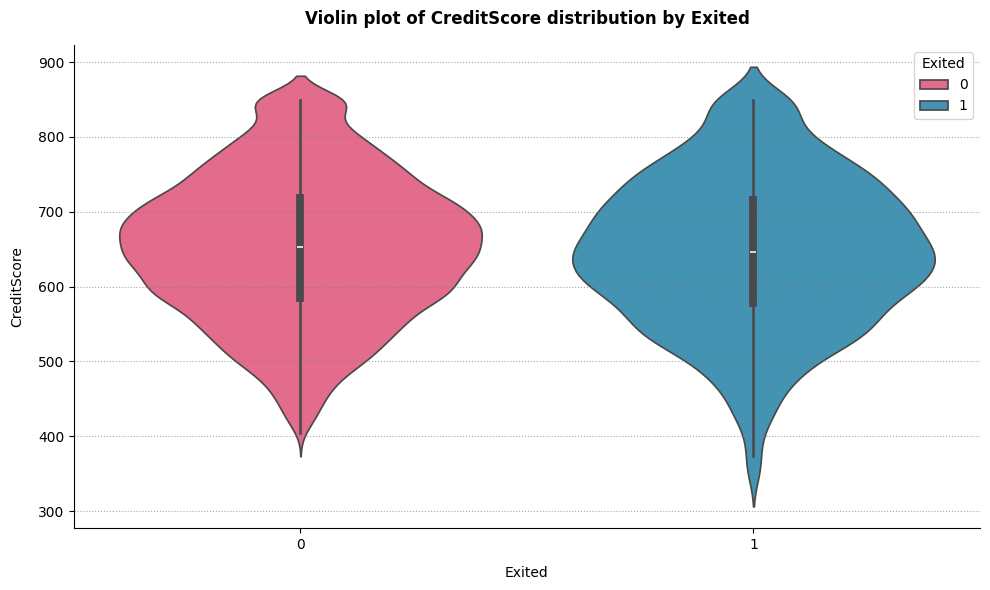

,Exited,Count,Mean,Median,Std
1,1,2038,44.835623,45.000000,9.759754
0,0,7962,37.408063,36.000000,10.125957


🔎 D’Agostino and Pearson Normality Test for 'Age' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 3.423
  p-value   : 0.18055
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 2023.669
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Age' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 11878815.0
p-value     : 2.7802649610221583e-230

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Age' than Group '0'.


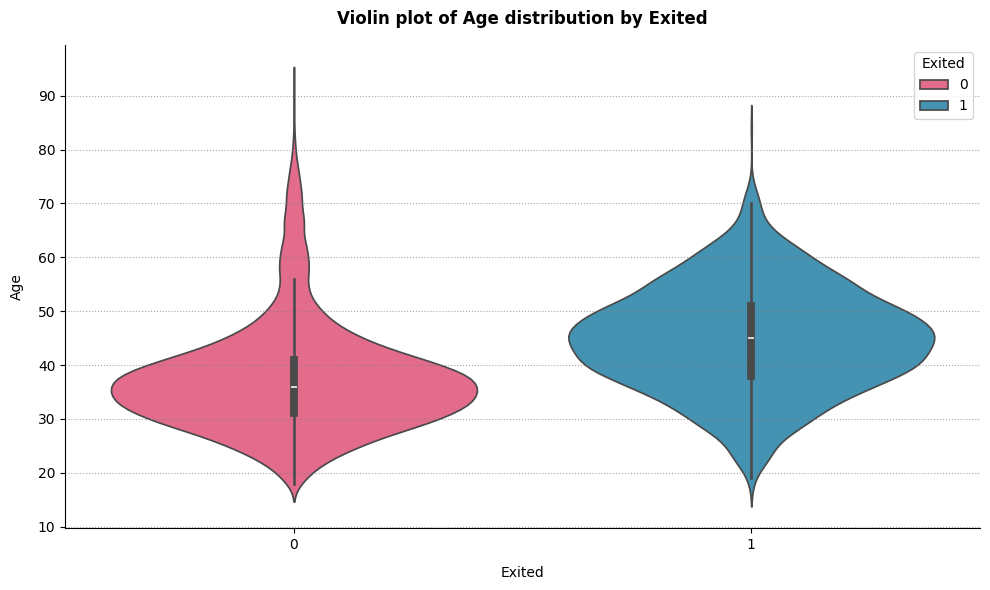

,Exited,Count,Mean,Median,Std
0,0,7962,5.032781,5.000000,2.880496
1,1,2038,4.934740,5.000000,2.936768


🔎 D’Agostino and Pearson Normality Test for 'Tenure' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 1379.974
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 4977.939
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Tenure' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7955556.0
p-value     : 0.1729583374544681

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


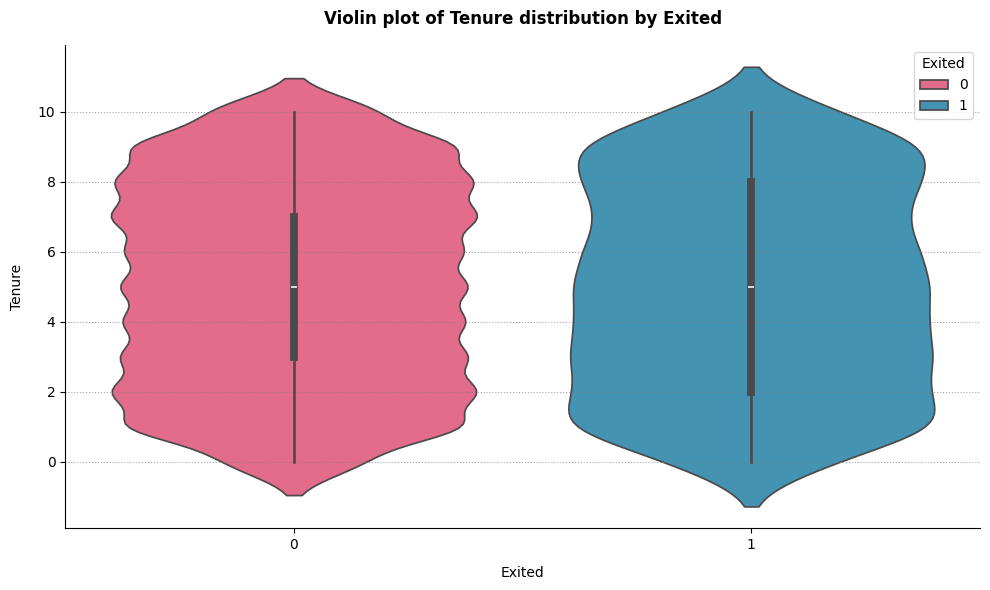

,Exited,Count,Mean,Median,Std
1,1,2038,91109.476562,109344.230469,58346.483163
0,0,7962,72742.750000,92063.058594,62851.577085


🔎 D’Agostino and Pearson Normality Test for 'Balance' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 392.080
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 42753.072
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Balance' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9373909.5
p-value     : 1.1687654686289807e-28

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Balance' than Group '0'.


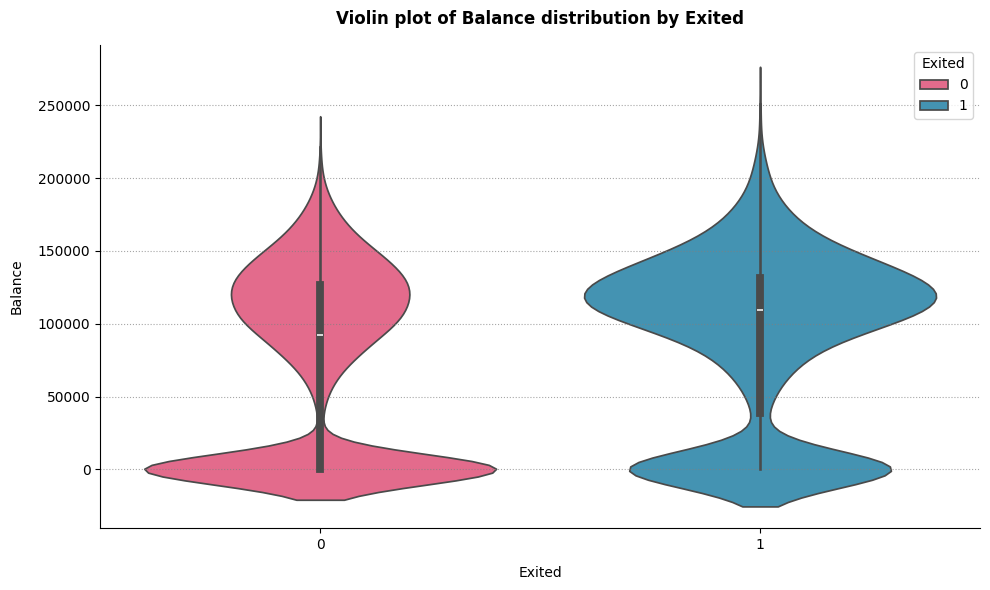

,Exited,Count,Mean,Median,Std
1,1,2038,101509.914062,102489.335938,57932.623378
0,0,7962,99726.851562,99620.355469,57399.956711


🔎 D’Agostino and Pearson Normality Test for 'EstimatedSalary' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 1834.219
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 5453.509
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'EstimatedSalary' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8258306.0
p-value     : 0.21235576456250627

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


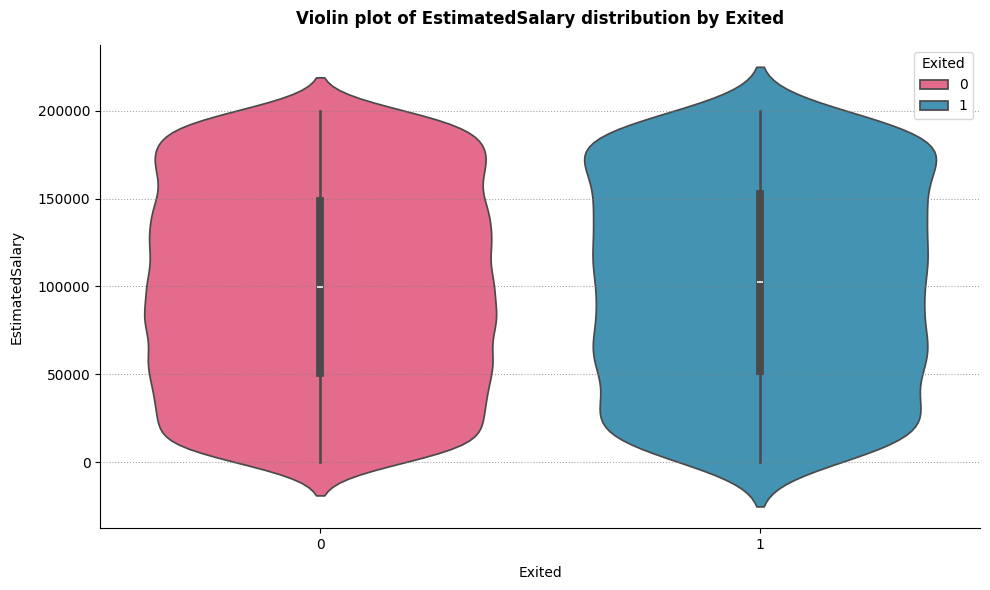

,Exited,Count,Mean,Median,Std
0,0,7962,607.044084,603.000000,226.091682
1,1,2038,604.448479,610.500000,225.315301


🔎 D’Agostino and Pearson Normality Test for 'PointEarned' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 1510.973
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 6581.955
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'PointEarned' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8062041.5
p-value     : 0.6595122287415172

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


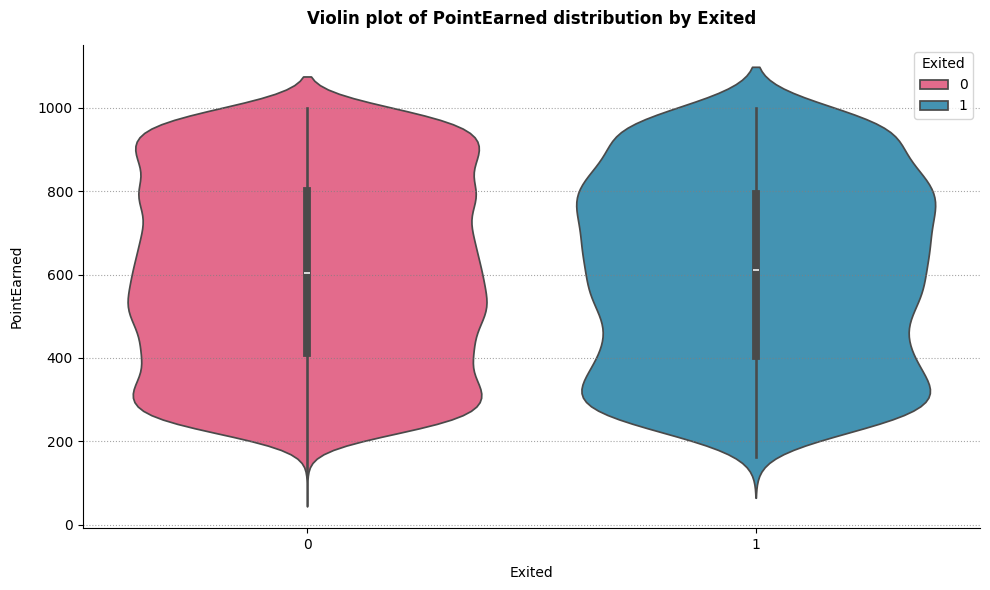

In [34]:
for feature in num_features:
    plot_numerical_distribution_by_Attrition(feature=feature)

### Insight Numerical Features by Exited

`CreditScore`

* Có sự khác biệt có ý nghĩa thống kê về điểm tín dụng giữa nhóm khách hàng rời đi và nhóm còn lại (giá trị p ≈ 0.0217 < 0.05).
* Nhóm không rời đi có điểm tín dụng trung vị cao hơn (653 so với 646).

→ Biến **CreditScore** có vẻ có ảnh hưởng nhất định đến hành vi rời đi, tuy nhiên mức độ ảnh hưởng là **không lớn** do sự chênh lệch nhỏ.

`Age`

* Có sự khác biệt có ý nghĩa thống kê về độ tuổi giữa khách hàng rời đi và khách hàng ở lại.
* Tuổi trung vị của nhóm rời đi cao hơn đáng kể (45 so với 36), cho thấy **khách hàng lớn tuổi có xu hướng rời đi nhiều hơn**.

→ Điều này cho thấy *tuổi* là một yếu tố **quan trọng** cho hành vi rời đi của khách hàng.

`Tenure`

* Kiểm định Mann-Whitney U cho thấy **không có sự khác biệt có ý nghĩa thống kê** về số năm gắn bó (tenure) giữa hai nhóm khách hàng.
* Với giá trị p = 0.17 > 0.05, tức là phân phối của biến *Tenure* là tương tự giữa hai nhóm.

`Balance`

* Kết quả kiểm định cho thấy có sự **khác biệt có ý nghĩa thống kê** về số dư tài khoản giữa nhóm rời đi và nhóm còn lại.
* Nhóm khách hàng rời đi có số dư trung vị cao hơn (109,344 so với 92,063).

→ Điều này gợi ý rằng *Balance* là một **yếu tố quan trọng**, với khách hàng có số dư cao hơn **có xu hướng rời đi nhiều hơn**.

`PointEarned` và `EstimatedSalary`

* Kiểm định Mann-Whitney U chỉ ra **không có sự khác biệt ý nghĩa thống kê** về hai biến này giữa nhóm rời đi và nhóm ở lại.
* Với giá trị p > 0.05, cho thấy phân phối của *PointEarned* và *EstimatedSalary* **tương đồng** giữa hai nhóm.

| Biến (Feature)     | Loại dữ liệu | Kiểm định thống kê       | Mối quan hệ với Exited | Tóm tắt                                                                            |
| ------------------ | ------------ | ------------------------ | ---------------------- | ---------------------------------------------------------------------------------- |
| **Geography**      | Phân loại    | Kiểm định Chi-Square     | ✅ Có ý nghĩa thống kê  | Khách hàng từ **Đức** có xu hướng rời đi cao hơn, trong khi **Pháp** thì thấp hơn. |
| **Gender**         | Phân loại    | Kiểm định Chi-Square     | ✅ Có ý nghĩa thống kê  | Khách hàng **nữ** có tỷ lệ rời đi **cao hơn nhẹ** so với nam.                      |
| **IsActiveMember** | Phân loại    | Kiểm định Chi-Square     | ✅ Có ý nghĩa thống kê  | Khách hàng **không hoạt động** có xu hướng rời đi cao hơn.                         |
| **Complain**       | Phân loại    | Kiểm định Chi-Square     | ✅ Có ý nghĩa thống kê  | Khách hàng **đã phàn nàn** có khả năng rời đi cao hơn.                             |
| **NumOfProducts**  | Phân loại    | Kiểm định Chi-Square     | ✅ Có ý nghĩa thống kê  | Nhóm khách hàng sử dụng **1, 3, 4 sản phẩm** có xu hướng rời đi nhiều hơn.         |
| **CreditScore**    | Số liên tục  | Kiểm định Mann–Whitney U | ✅ Có ý nghĩa thống kê  | Khách hàng không rời đi có **điểm tín dụng trung vị cao hơn** một chút.            |
| **Age**            | Số liên tục  | Kiểm định Mann–Whitney U | ✅ Có ý nghĩa thống kê  | Khách hàng rời đi có xu hướng **lớn tuổi hơn**.                                    |
| **Balance**        | Số liên tục  | Kiểm định Mann–Whitney U | ✅ Có ý nghĩa thống kê  | Khách hàng rời đi có **số dư tài khoản trung vị cao hơn đáng kể**.                 |

## Multivariate Analysis

### Tại sao Đức có tỷ lệ rời đi cao nhất?

In [35]:
df_customer_churn["Complain"] = df_customer_churn["Complain"].astype(int)

# % complain by Geography
complain_summary = df_customer_churn.groupby("Geography")["Complain"].mean().reset_index()
complain_summary.columns = ["Geography", "ComplainRate_All"]
complain_summary["ComplainRate_All"] = (complain_summary["ComplainRate_All"] * 100).round(2)
print(complain_summary)

  Geography  ComplainRate_All
0    France             16.19
1   Germany             32.64
2     Spain             16.67


***Đức nổi bật với tỷ lệ khiếu nại cao hơn đáng kể trên toàn bộ tập khách hàng — 32.6%, gấp đôi so với Pháp và Tây Ban Nha.***

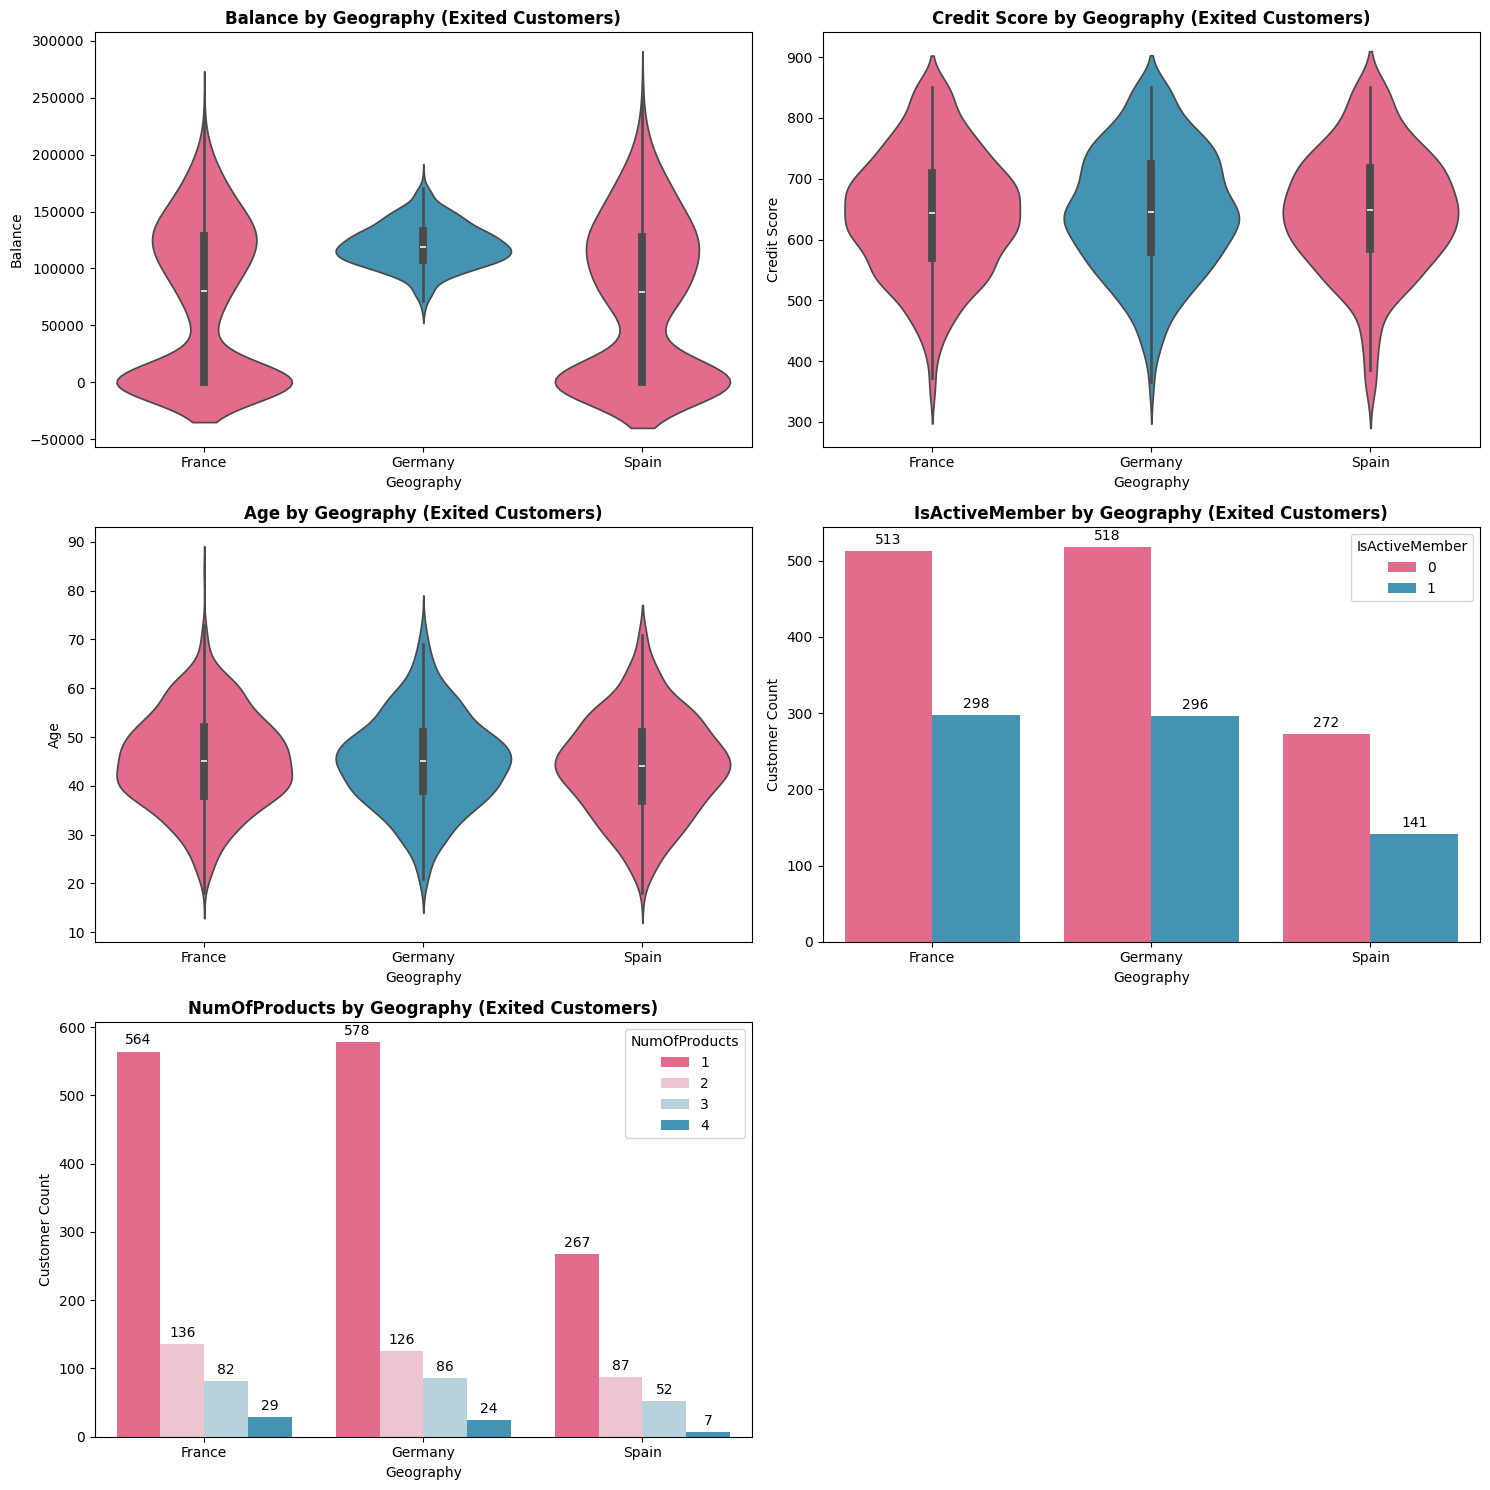

In [36]:
# Tạo figure với 3 hàng 2 cột (biểu đồ thứ 5 sẽ chiếm toàn bộ hàng cuối)
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax = ax.flatten()

# 1. Violinplot Balance
sns.violinplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    y="Balance",
    ax=ax[0],
    palette=color(n_colors=2)
)
ax[0].set_title("Balance by Geography (Exited Customers)", weight="bold")
ax[0].set_xlabel("Geography")
ax[0].set_ylabel("Balance")

# 2. Violinplot CreditScore
sns.violinplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    y="CreditScore",
    ax=ax[1],
    palette=color(n_colors=2)
)
ax[1].set_title("Credit Score by Geography (Exited Customers)", weight="bold")
ax[1].set_xlabel("Geography")
ax[1].set_ylabel("Credit Score")

# 3. Violinplot Age
sns.violinplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    y="Age",
    ax=ax[2],
    palette=color(n_colors=2)
)
ax[2].set_title("Age by Geography (Exited Customers)", weight="bold")
ax[2].set_xlabel("Geography")
ax[2].set_ylabel("Age")

# 4. Countplot IsActiveMember
ax_active = sns.countplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    hue="IsActiveMember",
    ax=ax[3],
    palette=color(n_colors=2)
)
ax[3].set_title("IsActiveMember by Geography (Exited Customers)", weight="bold")
ax[3].set_xlabel("Geography")
ax[3].set_ylabel("Customer Count")
for container in ax_active.containers:
    ax[3].bar_label(container, fmt='%d', label_type='edge', padding=3)

# 5. Countplot NumOfProducts (đặt riêng hàng cuối)
ax_product = sns.countplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    hue="NumOfProducts",
    ax=ax[4],
    palette=color(n_colors=4)
)
ax[4].set_title("NumOfProducts by Geography (Exited Customers)", weight="bold")
ax[4].set_xlabel("Geography")
ax[4].set_ylabel("Customer Count")
for container in ax_product.containers:
    ax[4].bar_label(container, fmt='%d', label_type='edge', padding=3)

# Ẩn subplot thứ 6 nếu không dùng
fig.delaxes(ax[5])

# Tối ưu layout
plt.tight_layout()
plt.show()

**Nhận định** <br>

* Không có sự khác biệt đáng kể về **IsActiveMember**, hay **NumOfProducts** giữa các quốc gia trong nhóm khách hàng đã rời bỏ.
* ***Mặc dù có điểm tín dụng cao hơn  và số dư tài khoản cao hơn trong nhóm khách hàng đã rời bỏ nhưng Đức có tỷ lệ khiếu nại cao nhất (32.6%). Điều này cho thấy sự không hài lòng và việc mất đi những khách hàng có giá trị cao, có thể lý giải cho tỷ lệ rời bỏ cao tại Đức.***

### Tại sao nữ lại có tỷ lệ churn cao hơn nam giới?

In [37]:
def gender_churn_summary(df):
    summary = df.groupby("Gender").agg(
        ChurnRate=("Exited", "mean"),
        Avg_Balance=("Balance", "mean"),
        Percent_Inactive=("IsActiveMember", lambda x: (x == 0).mean()),
        Avg_Age=("Age", "mean"),
        Avg_CreditScore=("CreditScore", "mean"),
        Avg_EstimatedSalary=("EstimatedSalary", "mean"),
        Avg_PointEarned=("PointEarned", "mean"),
        Percent_Complain=("Complain", lambda x: (x == 1).mean()),
        Count=("Exited", "count")
    ).reset_index()

    # Format lại dữ liệu
    summary["ChurnRate"] = (summary["ChurnRate"] * 100).round(2)
    summary["Percent_Inactive"] = (summary["Percent_Inactive"] * 100).round(2)
    summary["Percent_Complain"] = (summary["Percent_Complain"] * 100).round(2)
    summary["Avg_Balance"] = summary["Avg_Balance"].round(0)
    summary["Avg_CreditScore"] = summary["Avg_CreditScore"].round(0)
    summary["Avg_EstimatedSalary"] = summary["Avg_EstimatedSalary"].round(0)
    summary["Avg_PointEarned"] = summary["Avg_PointEarned"].round(0)
    summary["Avg_Age"] = summary["Avg_Age"].round(1)

    return summary

# Gọi hàm với DataFrame gốc
summary_all = gender_churn_summary(df_customer_churn)

from tabulate import tabulate
print(tabulate(summary_all, headers='keys', tablefmt='github', showindex=False))

| Gender   |   ChurnRate |   Avg_Balance |   Percent_Inactive |   Avg_Age |   Avg_CreditScore |   Avg_EstimatedSalary |   Avg_PointEarned |   Percent_Complain |   Count |
|----------|-------------|---------------|--------------------|-----------|-------------------|-----------------------|-------------------|--------------------|---------|
| Female   |       25.07 |         75659 |              49.72 |      39.2 |               651 |                100602 |               610 |              25.14 |    4543 |
| Male     |       16.47 |         77174 |              47.46 |      38.7 |               650 |                 99665 |               604 |              16.53 |    5457 |


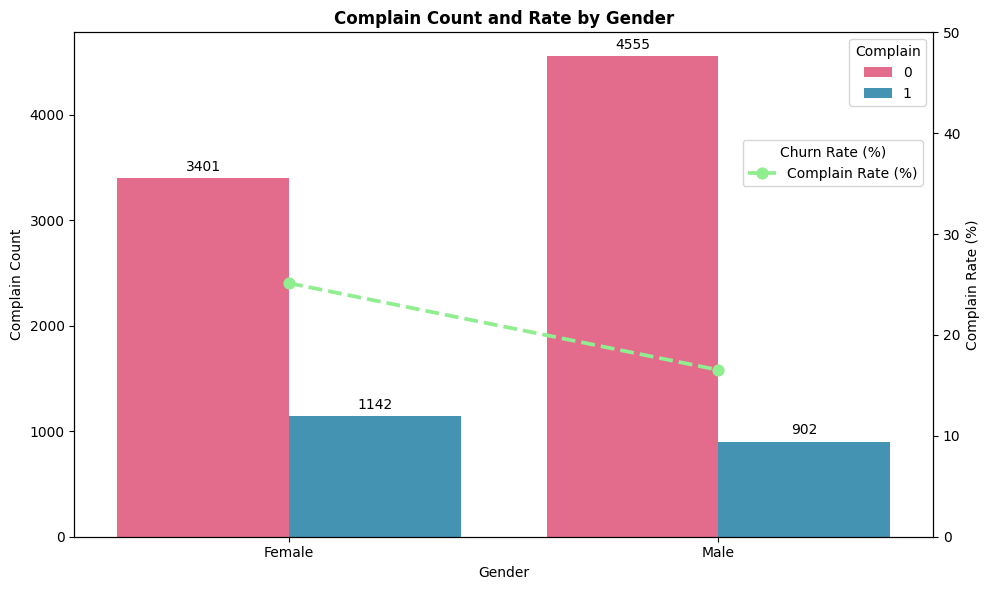

In [38]:
complain_rate = df_customer_churn.groupby("Gender")["Complain"].mean().reset_index()
complain_rate["Complain"] = complain_rate["Complain"] * 100

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: Complain Count
sns.countplot(
    data=df_customer_churn,
    x="Gender",
    hue="Complain",
    palette=color(n_colors=2),
    ax=ax1
)

ax1.set_title("Complain Count and Rate by Gender", weight="bold")
ax1.set_ylabel("Complain Count")
ax1.set_xlabel("Gender")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%d", label_type="edge", padding=3)

# Complain Rate
ax2 = ax1.twinx()
sns.pointplot(
    data=complain_rate,
    x="Gender",
    y="Complain",
    color="lightgreen",
    markers="o",
    linestyles="--",
    label="Complain Rate (%)",
    ax=ax2
)

ax2.set_ylabel("Complain Rate (%)", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.legend(title="Churn Rate (%)", loc="upper left", bbox_to_anchor=(0.77, 0.8))
ax2.set_ylim(0, 50)

plt.tight_layout()
plt.show()


***Khách hàng nữ có tỷ lệ rời bỏ dịch vụ cao hơn, có thể xuất phát từ mức độ không hài lòng cao hơn (thể hiện qua tỷ lệ khiếu nại cao hơn), mặc dù họ tương đối tích cực tham gia (Điểm tích lũy cao hơn). Điều này cho thấy vấn đề nằm ở trải nghiệm khách hàng hoặc chất lượng dịch vụ không đáp ứng được kỳ vọng của họ, chứ không phải do các yếu tố tài chính như thu nhập hoặc điểm tín dụng.***

### Liệu khách hàng hài lòng có xu hướng sử dụng nhiều sản phẩm và trung thành hơn không?

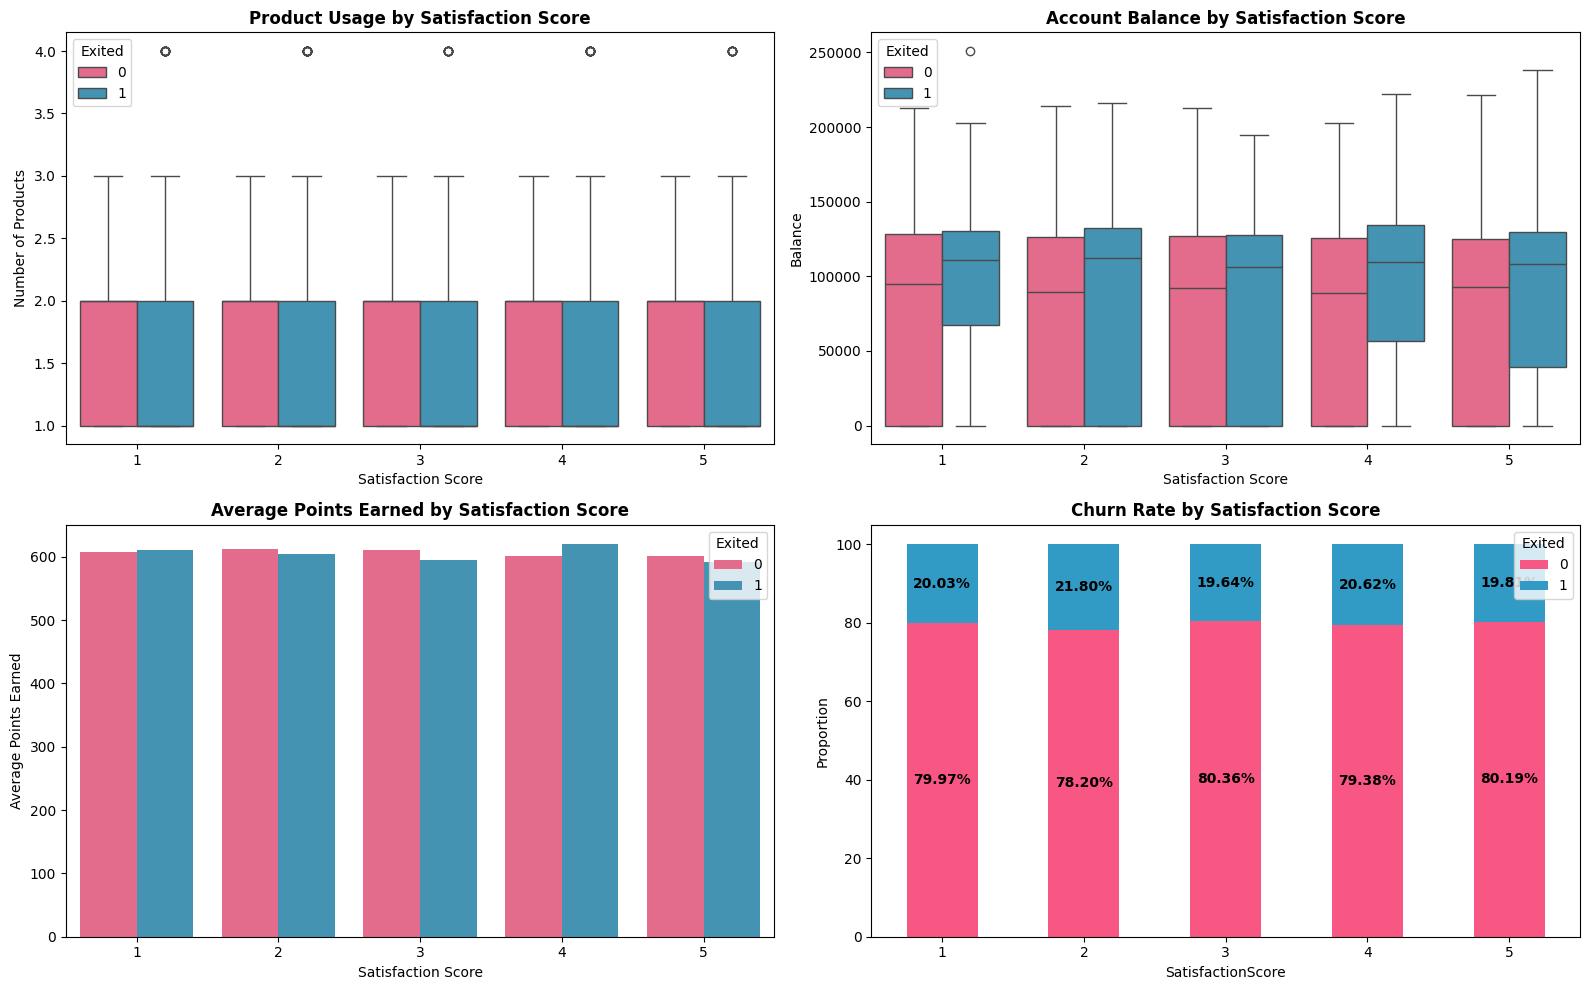

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# A. Satisfaction Score vs NumOfProducts
sns.boxplot(x="SatisfactionScore", y="NumOfProducts", data=df_customer_churn, 
            ax=ax[0, 0], hue="Exited", palette=color(n_colors=2))
ax[0, 0].set_title("Product Usage by Satisfaction Score", weight="bold")
ax[0, 0].invert_yaxis()
ax[0, 0].set_xlabel("Satisfaction Score")
ax[0, 0].set_ylabel("Number of Products")

# B. Satisfaction Score vs Balance
sns.boxplot(x="SatisfactionScore", y="Balance", data=df_customer_churn, 
            ax=ax[0, 1], hue="Exited", palette=color(n_colors=2))
ax[0, 1].set_title("Account Balance by Satisfaction Score", weight="bold")
ax[0, 1].set_xlabel("Satisfaction Score")
ax[0, 1].set_ylabel("Balance")

# C. Satisfaction Score vs Point Earned (Mean barplot)
sns.barplot(x="SatisfactionScore", y="PointEarned", data=df_customer_churn, estimator=np.mean, 
            ci=None, ax=ax[1, 0], hue="Exited", palette=color(n_colors=2))
ax[1, 0].set_title("Average Points Earned by Satisfaction Score", weight="bold")
ax[1, 0].set_xlabel("Satisfaction Score")
ax[1, 0].set_ylabel("Average Points Earned")

# D. Satisfaction Score vs Exited (stacked barplot)
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
exit_rate = df_customer_churn.groupby("SatisfactionScore")["Exited"].value_counts(normalize=True).unstack() * 100
exit_rate.plot(kind="bar", stacked=True, cmap=cmap, ax=ax[1, 1])
for container in ax[1, 1].containers:
    ax[1, 1].bar_label(container, fmt="%1.2f%%", label_type="center", weight="bold", fontsize=10)
ax[1, 1].set_title("Churn Rate by Satisfaction Score", weight="bold")
ax[1, 1].set_ylabel("Proportion")
ax[1, 1].legend(title="Exited", loc="upper right")
ax[1, 1].tick_params(axis="x", labelrotation=0)

plt.tight_layout()
plt.show()

**Liệu khách hàng hài lòng có xu hướng sử dụng nhiều sản phẩm và trung thành hơn không?**

**Về số lượng sản phẩm (`NumOfProducts`)**

* Khách hàng ở mọi mức `Satisfaction Score` đều dùng chủ yếu **1–2 sản phẩm**.
* Không có sự khác biệt đáng kể giữa nhóm hài lòng và không hài lòng.

**Kết luận**

> **Mức độ hài lòng không ảnh hưởng đến số lượng sản phẩm mà khách sử dụng.**

**Về sự trung thành (`Exited` = 0 là trung thành, `Exited` = 1 là churn)**

**Quan sát từ biểu đồ churn theo `Satisfaction Score`**:

* **Tỷ lệ churn gần như bằng nhau (\~20%) ở tất cả các mức hài lòng**, kể cả mức `Satisfaction Score = 5`.
* Không có xu hướng "càng hài lòng → càng ít rời đi".

**Kết luận**:

> Khách hàng hài lòng **không dùng nhiều sản phẩm hơn**.
> Khách hàng hài lòng **không trung thành hơn**.

### Nhóm tuổi nào có hành vi sử dụng sản phẩm mạnh mẽ nhất?

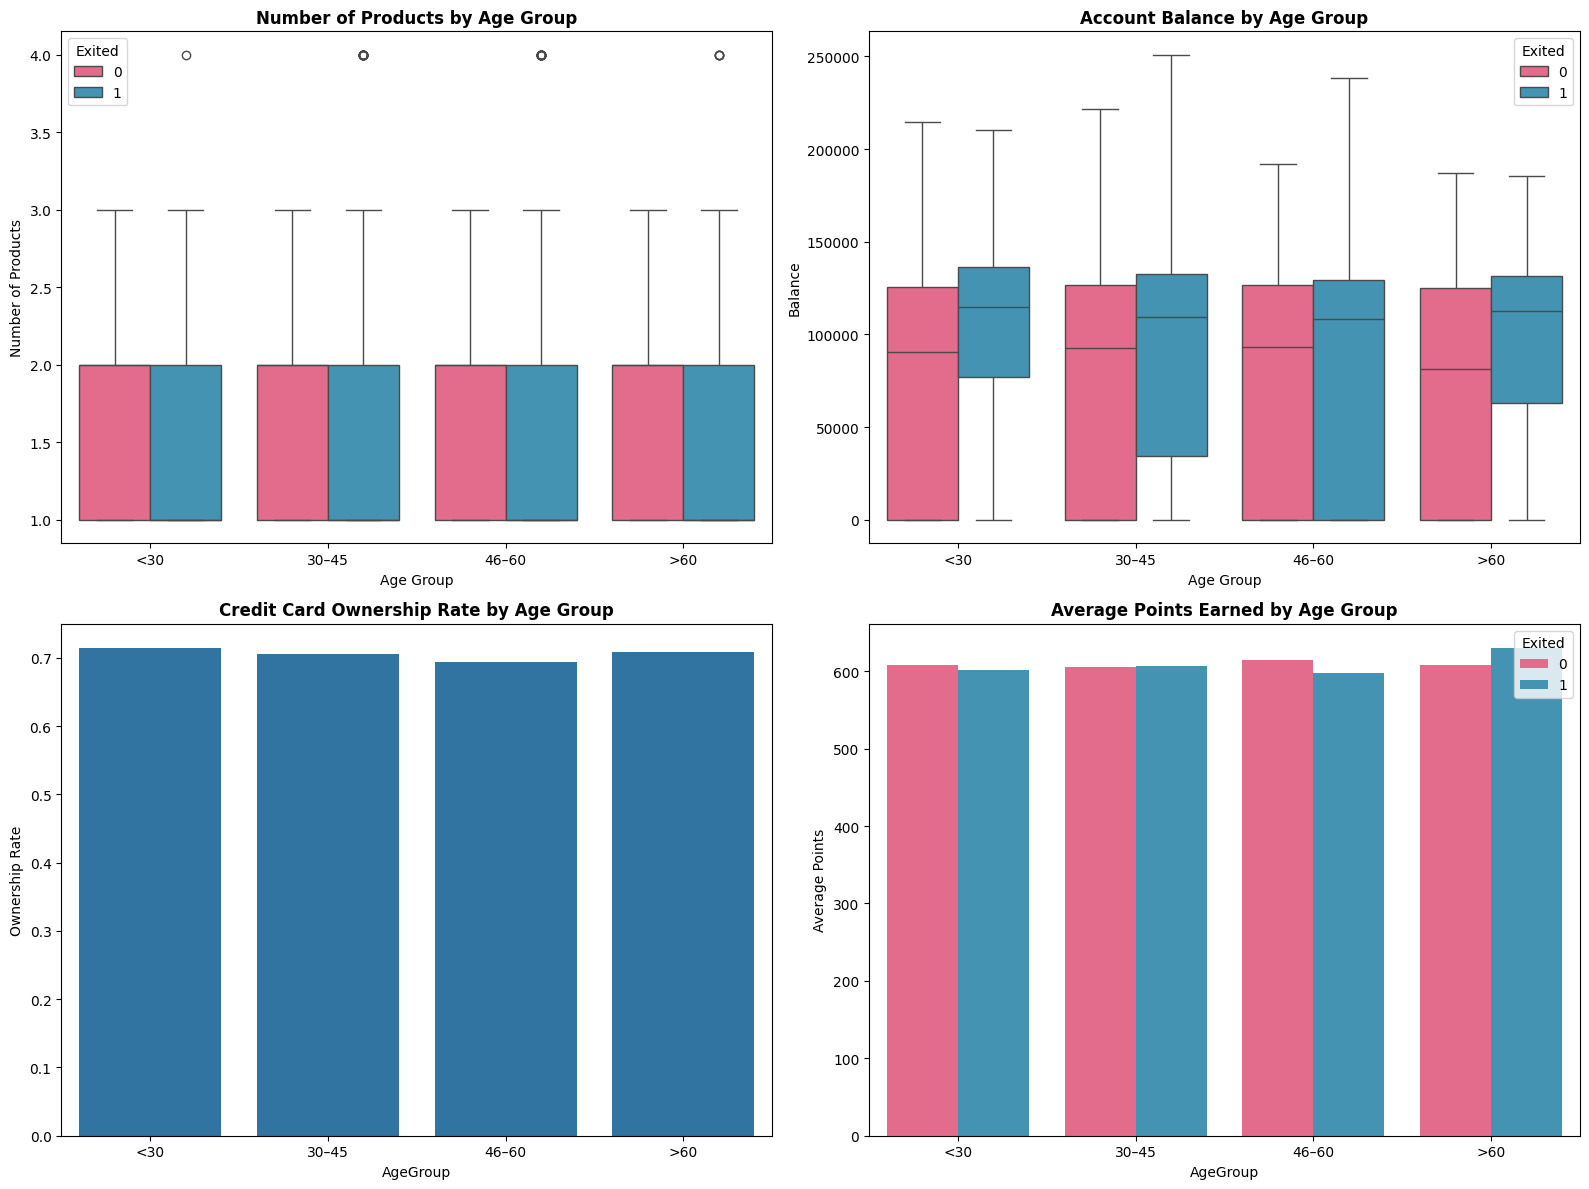

In [40]:
bins = [0, 30, 45, 60, 100]
labels = ["<30", "30–45", "46–60", ">60"]
df_customer_churn["AgeGroup"] = pd.cut(df_customer_churn["Age"], bins=bins, labels=labels, right=False)
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# A. Number of Products by Age Group
sns.boxplot(x="AgeGroup", y="NumOfProducts", data=df_customer_churn, ax=ax[0, 0], hue="Exited", palette=color(n_colors=2))
ax[0, 0].set_title("Number of Products by Age Group", weight="bold")
ax[0, 0].set_xlabel("Age Group")
ax[0, 0].invert_yaxis()
ax[0, 0].set_ylabel("Number of Products")

# B. Balance by Age Group
sns.boxplot(x="AgeGroup", y="Balance", data=df_customer_churn, ax=ax[0, 1], hue="Exited", palette=color(n_colors=2))
ax[0, 1].set_title("Account Balance by Age Group", weight="bold")
ax[0, 1].set_xlabel("Age Group")
ax[0, 1].set_ylabel("Balance")

# C. Credit Card Ownership Rate by Age Group
card_rate = df_customer_churn.groupby("AgeGroup")["HasCrCard"].apply(lambda x: x.astype(int).mean()).reset_index()
sns.barplot(x="AgeGroup", y="HasCrCard", data=card_rate, ax=ax[1, 0])
ax[1, 0].set_title("Credit Card Ownership Rate by Age Group", weight="bold")
ax[1, 0].set_ylabel("Ownership Rate")

# D. Average Points Earned by Age Group
sns.barplot(x="AgeGroup", y="PointEarned", data=df_customer_churn, estimator=np.mean, ci=None,
            ax=ax[1, 1], hue="Exited", palette=color(n_colors=2))
ax[1, 1].set_title("Average Points Earned by Age Group", weight="bold")
ax[1, 1].set_ylabel("Average Points")

plt.tight_layout()
plt.show()

* Không có nhóm tuổi nào nổi bật rõ ràng về mức độ sử dụng sản phẩm.
* Sự khác biệt chính nằm ở tính năng Cân bằng, nhưng đây là sự phân biệt giữa nhóm Thoát và nhóm Không Thoát, chứ không phải giữa các nhóm tuổi.

### Tìm hiểu về nhóm có số dư 0 đồng

In [41]:
zero_balance_pct = (df_customer_churn['Balance'] == 0).mean() * 100
print(f"Percentage of customers with zero account balance: {zero_balance_pct:.2f}%")

Percentage of customers with zero account balance: 36.17%


In [42]:
# Tính Q1 và Q3
q1 = df_customer_churn[df_customer_churn["Balance"] > 0]["Balance"].quantile(0.25)
q3 = df_customer_churn["Balance"].quantile(0.75)

# Hàm phân loại
def classify_balance(balance):
    if balance == 0:
        return "Zero"
    elif balance <= q1:
        return "Low"
    elif balance <= q3:
        return "Mid"
    else:
        return "High"

# Tạo cột mới
df_customer_churn["BalanceGroup"] = df_customer_churn["Balance"].apply(classify_balance)

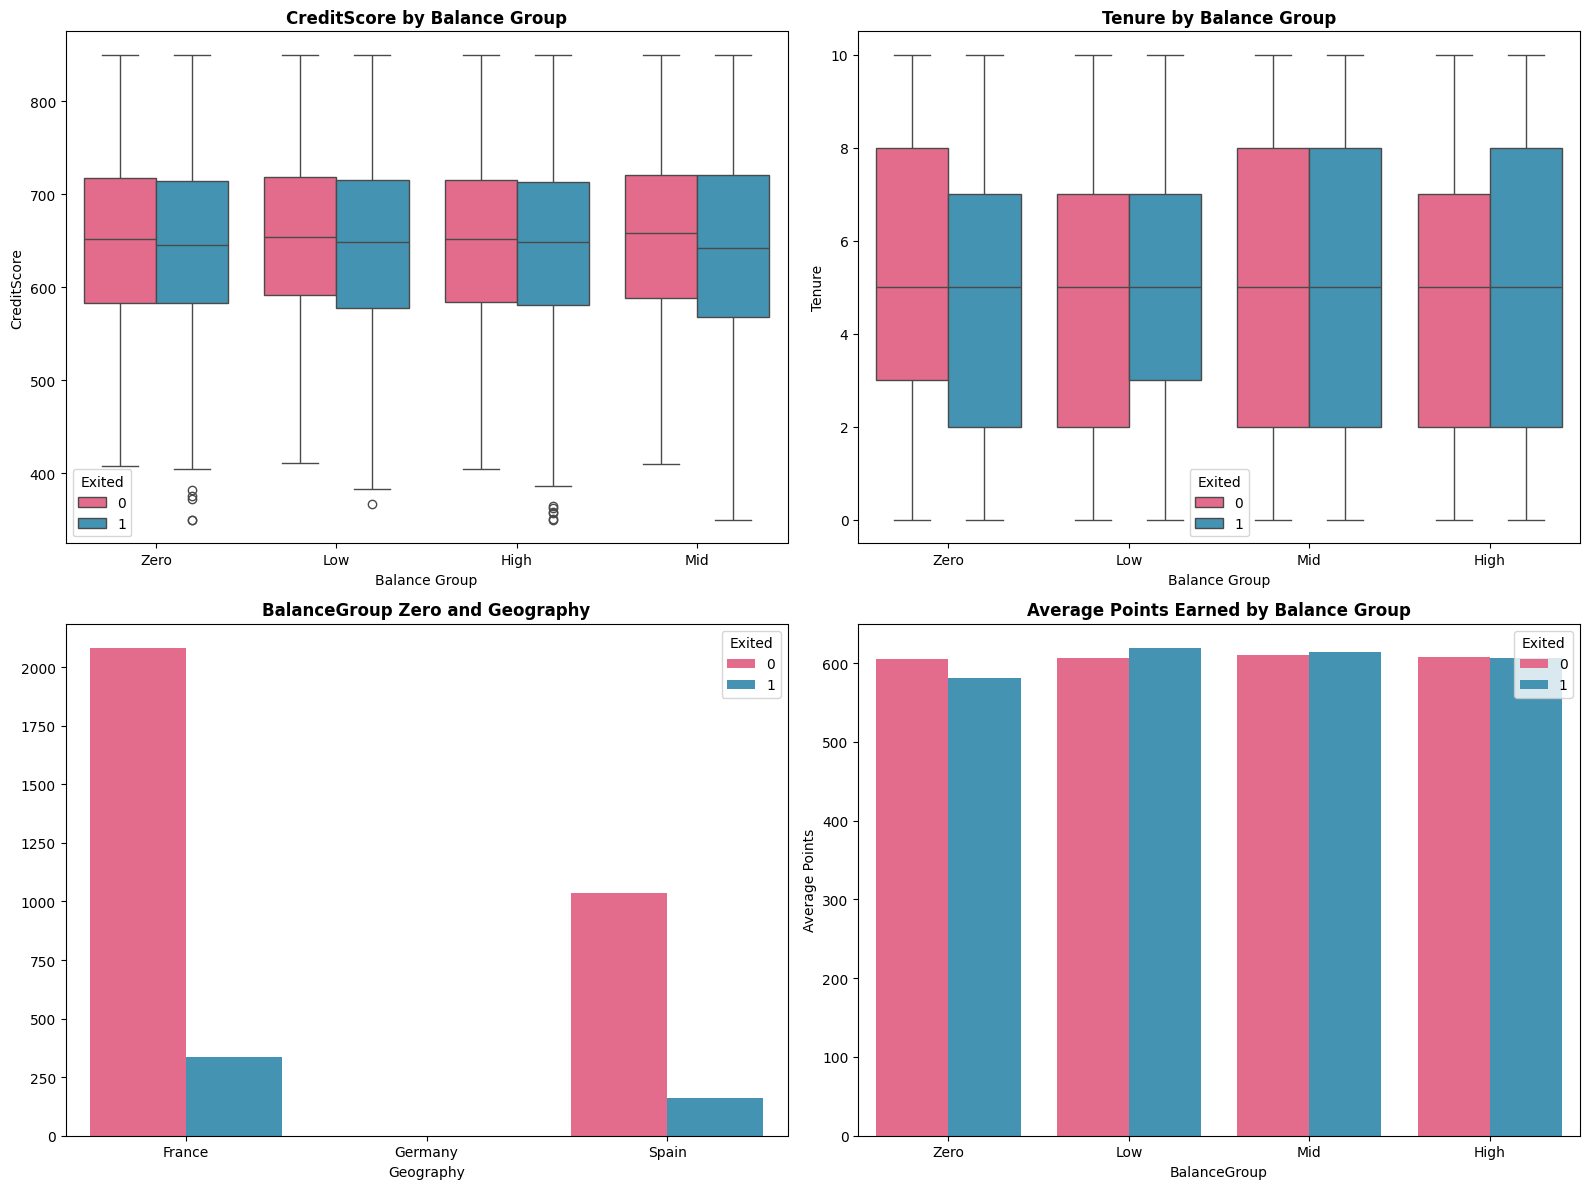

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
order = ["Zero", "Low", "Mid", "High"]

# A. CreditScore by Balance Group
sns.boxplot(x="BalanceGroup", y="CreditScore", data=df_customer_churn, ax=ax[0, 0], hue="Exited", palette=color(n_colors=2))
ax[0, 0].set_title("CreditScore by Balance Group", weight="bold")
ax[0, 0].set_xlabel("Balance Group")
ax[0, 0].set_ylabel("CreditScore")

# B. Tenure by Balance Group
sns.boxplot(x="BalanceGroup", y="Tenure", data=df_customer_churn, ax=ax[0, 1], hue="Exited", palette=color(n_colors=2), order=order)
ax[0, 1].set_title("Tenure by Balance Group", weight="bold")
ax[0, 1].set_xlabel("Balance Group")
ax[0, 1].set_ylabel("Tenure")

# C. BalanceGroup and Geography
sns.countplot(x="Geography", data=df_customer_churn[df_customer_churn["BalanceGroup"] == "Zero"], ax=ax[1, 0], hue="Exited", palette=color(n_colors=2))
ax[1, 0].set_title("BalanceGroup Zero and Geography", weight="bold")
ax[1, 0].set_ylabel("")

# D. Average Points Earned by Balance Group
sns.barplot(x="BalanceGroup", y="PointEarned", data=df_customer_churn, estimator=np.mean, ci=None,
            ax=ax[1, 1], hue="Exited", palette=color(n_colors=2), order=order)
ax[1, 1].set_title("Average Points Earned by Balance Group", weight="bold")
ax[1, 1].set_ylabel("Average Points")

plt.tight_layout()
plt.show()

* Balance = 0 không phản ánh hành vi khác biệt về mức độ gắn bó (tenure), tín dụng (score), hay mức độ tương tác (points earned) giữa hai nhóm churn và không churn.
* Không có khách hàng nào tại Germany thuộc nhóm Balance = 0. Trong khi đó France có rất nhiều khách Balance = 0 (churn và non-churn) và Spain cũng có một lượng lớn Balance = 0.

### Khách hàng có đang tận dụng tốt các dịch vụ tài chính của ngân hàng không?

  UtilizationLevel  ChurnRate
0             High      23.94
1              Low      13.82
2           Medium      24.27


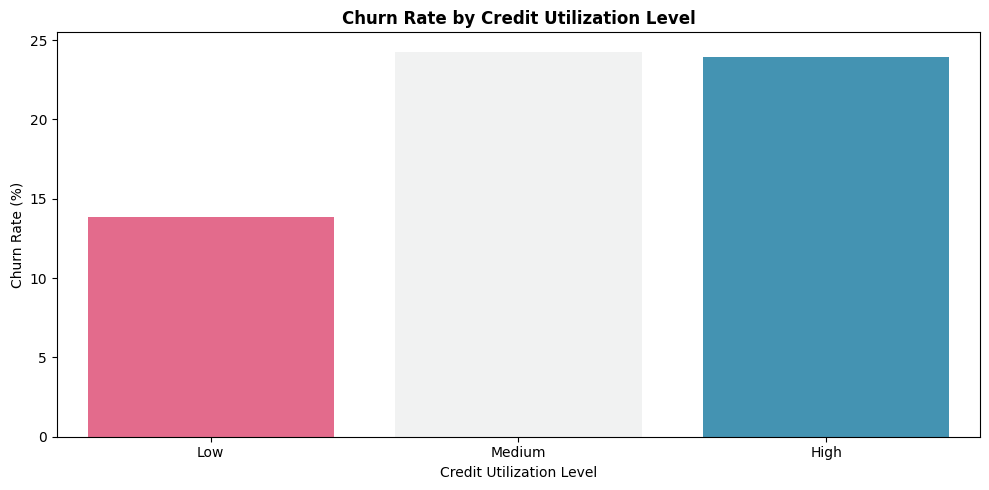

In [44]:
# Tạo chỉ số Credit Utilization
df_customer_churn["CreditUtilization"] = df_customer_churn["Balance"] / df_customer_churn["EstimatedSalary"]

# Tạo các ngưỡng phân vị
quantiles = df_customer_churn["CreditUtilization"].quantile([0.33, 0.66])

# Hàm phân loại
def categorize_utilization(x):
    if x <= quantiles[0.33]:
        return "Low"
    elif x <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"

# Áp dụng phân nhóm
df_customer_churn["UtilizationLevel"] = df_customer_churn["CreditUtilization"].apply(categorize_utilization)

util_churn_summary = (
    df_customer_churn
    .groupby("UtilizationLevel")["Exited"]
    .mean()
    .reset_index()
    .rename(columns={"Exited": "ChurnRate"})
)

util_churn_summary["ChurnRate"] = (util_churn_summary["ChurnRate"] * 100).round(2)
print(util_churn_summary)


plt.figure(figsize=(10, 5))
sns.barplot(data=util_churn_summary, x="UtilizationLevel", y="ChurnRate", 
            palette=color(n_colors=3), order=["Low", "Medium", "High"])
plt.title("Churn Rate by Credit Utilization Level", weight="bold")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Credit Utilization Level")
plt.tight_layout()
plt.show()


### Loại thẻ (DIAMOND, GOLD, v.v.) có gắn liền với mức độ trung thành và giá trị khách hàng không?

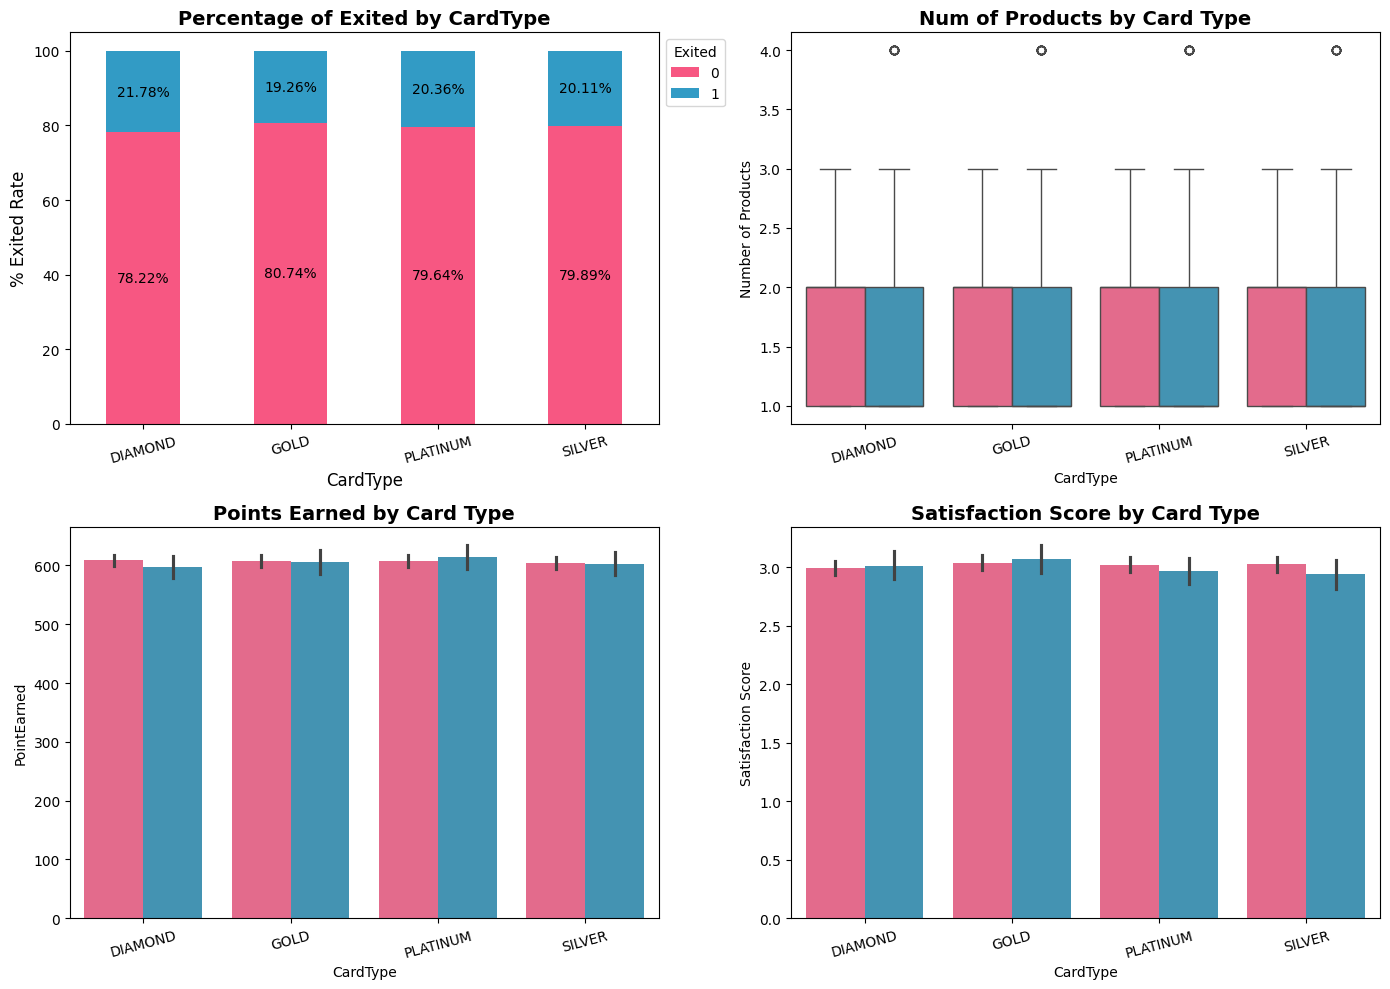

In [45]:
# Tạo 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

# 1. Churn Rate
grouped = df_customer_churn.groupby(["CardType", "Exited"]).size().unstack(fill_value=0)
# Calculate the percentages
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# Draw stacked bar plot
ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%1.2f%%", label_type="center", fontsize=10)

ax[0].set_title(f"Percentage of Exited by CardType", fontsize=14, weight="bold")
ax[0].set_xlabel("CardType", fontsize=12)
ax[0].set_ylabel("% Exited Rate", fontsize=12)
ax[0].set_xticklabels(labels = percentages.index, rotation = 0)
ax[0].legend(title="Exited", bbox_to_anchor=(1, 1), loc="upper left")
# ax[0].legend_.remove()
# ax[0].grid(color="gray", linestyle=":", linewidth=0.7)

# 2. NumOfProducts
sns.boxplot(data=df_customer_churn, x="CardType", y="NumOfProducts", ax=ax[1],
            palette=color(n_colors=2), hue="Exited")
ax[1].set_title("Num of Products by Card Type", fontsize=14, weight="bold")
ax[1].set_ylabel("Number of Products")
ax[1].invert_yaxis()
ax[1].legend_.remove()

# 3. Avg Point Earned
sns.barplot(data=df_customer_churn, x="CardType", y="PointEarned", ax=ax[2], palette=color(n_colors=2), hue="Exited")
ax[2].set_title("Points Earned by Card Type", fontsize=14, weight="bold")
ax[2].set_ylabel("PointEarned")
ax[2].legend_.remove()

# 4. SatisfactionScore
sns.barplot(data=df_customer_churn, x="CardType", y="SatisfactionScore", ax=ax[3], palette=color(n_colors=2), hue="Exited")
ax[3].set_title("Satisfaction Score by Card Type", fontsize=14, weight="bold")
ax[3].set_ylabel("Satisfaction Score")
ax[3].invert_yaxis()
ax[3].legend_.remove()

# Format chung
for ax in ax:
    ax.set_xlabel("CardType")
    ax.tick_params(axis="x", rotation=15)

plt.tight_layout()
plt.show()

**Nhận định từ biểu đồ "Card Type vs Loyalty & Value"**

**Churn Rate**

* Các loại thẻ DIAMOND, GOLD, PLATINUM, SILVER đều có churn rate dao động quanh \~20%.
* ➤ **Không có loại thẻ nào thể hiện churn thấp vượt trội** hay trung thành hơn nhóm khác.

**Num of Products / Points Earned / Satisfaction Score**

* **Phân phối rất giống nhau** giữa các loại thẻ.
* Không có thẻ nào rõ ràng có **số sản phẩm cao hơn**, **điểm tích lũy nhiều hơn**, hay **mức độ hài lòng cao hơn** đáng kể.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>

## Phân tích đặc điểm khách hàng rời bỏ (Churn)

Dựa trên phân tích dữ liệu và trực quan hóa trong notebook, các khách hàng có xu hướng **rời bỏ ngân hàng (Exited = 1)** thường chia sẻ các đặc điểm sau:

**1. Độ tuổi (Age)**
- Khách hàng churn có xu hướng **lớn tuổi hơn**.
- Phân phối tuổi nghiêng về phía **trên 40 tuổi**, đặc biệt từ **50–70 tuổi**.

**2. Số dư tài khoản (Balance)**
- Khách hàng churn có xu hướng sở hữu **số dư cao hơn**.
- Một số trường hợp có số dư trên **150,000**, cho thấy nhóm này có **giá trị tài chính lớn**.

**3. Quốc gia (Geography)**
- **Germany** có tỷ lệ khách hàng churn cao nhất (khoảng **32.6%** trong nhóm churn).
- Đây cũng là quốc gia có tỷ lệ **phàn nàn cao** và mức độ hài lòng thấp.

**4. Điểm tín dụng (Credit Score)**
- Không có sự khác biệt lớn giữa nhóm churn và không churn.
- Tuy nhiên, vẫn tồn tại churn ở **khách hàng có điểm tín dụng cao** (>700).

**5. Mức độ hoạt động (IsActiveMember)**
- Tỷ lệ khách hàng churn **không hoạt động (inactive)** cao hơn.

**6. Số lượng sản phẩm sử dụng (NumOfProducts)**
- Khách hàng churn chủ yếu sử dụng **1 sản phẩm duy nhất**.
- => Gắn bó thấp, ít tiếp xúc với các dịch vụ khác → dễ rời bỏ.

**7. Khiếu nại và hài lòng (Complain)**
- Tỷ lệ **khiếu nại cao** rất cao sấp sỉ 100% tức là những người khiếu nại thì sẽ rời bỏ.
- => Dịch vụ khách hàng và trải nghiệm cần cải thiện, đặc biệt tại các quốc gia có churn cao.

**Tổng hợp nhanh:**

| Đặc điểm                 | Xu hướng khách hàng churn            |
|--------------------------|--------------------------------------|
| Tuổi                    | Lớn tuổi hơn                        |
| Số dư tài khoản         | Cao hơn trung bình                  |
| Quốc gia                | Tập trung nhiều ở Germany           |
| Mức độ hoạt động        | Không hoạt động nhiều               |
| Sản phẩm sử dụng        | Chủ yếu dùng 1 sản phẩm             |
| Khiếu nại               | Nhiều khiếu nại, hài lòng thấp     |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Solution</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Solution
    </h1>
</div>

**Giải pháp đề xuất để giảm churn**

1. **Tập trung giữ chân khách hàng lớn tuổi & số dư cao** <br>
   → Gửi **ưu đãi cá nhân hóa**, **chăm sóc riêng** cho nhóm này (ví dụ: gói dịch vụ cao cấp, miễn phí phí thường niên).

2. **Cải thiện trải nghiệm khách hàng tại Germany** <br>
   → Xem lại **quy trình hỗ trợ**, khảo sát **mức độ hài lòng**, chú trọng chăm sóc khách hàng.

3. **Thúc đẩy tương tác với khách hàng không hoạt động** <br>
   → Gửi thông báo/ưu đãi định kỳ, chương trình khuyến mãi khi đăng nhập/mở app.

4. **Khuyến khích khách hàng sử dụng nhiều sản phẩm hơn**  <br>
   → Gói combo ưu đãi khi dùng thêm sản phẩm (ví dụ: mở thẻ tín dụng, gửi tiết kiệm kèm tài khoản thanh toán).

5. **Tăng điểm thưởng và khuyến mãi** <br>
   → Tích điểm dễ hơn, có quà tặng/quy đổi hấp dẫn để **tạo cảm giác được lợi**.